# IPL DATA SET ANALYSIS 

 # First step  : loading DATA SET AND IMPORTING necessary LIBERIES
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\Users\\VARUN\\OneDrive\\Attachments\\Desktop\\DATA SET\\ball_by_ball_ipl.csv")
df.info() # display basic information about data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239693 entries, 0 to 239692
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               239693 non-null  int64  
 1   Match ID                 239693 non-null  int64  
 2   Date                     239693 non-null  object 
 3   Venue                    239693 non-null  object 
 4   Bat First                239693 non-null  object 
 5   Bat Second               239693 non-null  object 
 6   Innings                  239693 non-null  int64  
 7   Over                     239693 non-null  int64  
 8   Ball                     239693 non-null  int64  
 9   Batter                   239693 non-null  object 
 10  Non Striker              239693 non-null  object 
 11  Bowler                   239693 non-null  object 
 12  Batter Runs              239693 non-null  int64  
 13  Extra Runs               239693 non-null  int64  
 14  Runs

In [401]:
df.head() # printing first few rows

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,RD Gaikwad,...,Chennai Super Kings,0,4,0,1,0,NaN,NaN,4,1
1,1,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,RD Gaikwad,...,Chennai Super Kings,0,4,0,2,0,NaN,NaN,0,1
2,2,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,RD Gaikwad,...,Chennai Super Kings,0,4,0,3,0,NaN,NaN,0,1
3,3,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,RD Gaikwad,...,Chennai Super Kings,0,4,0,4,0,NaN,NaN,0,1
4,4,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,RD Gaikwad,...,Chennai Super Kings,0,5,0,5,0,NaN,NaN,1,1


In [402]:
df.columns# to get columns names

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

  #  first we are trying to do  team win analysis

#  Count number of wins for each team


In [405]:
# Drop duplicates to get one row per match
match_winners = df[['Match ID', 'Winner']].drop_duplicates()

# Now count wins properly
team_wins = match_winners['Winner'].value_counts()
team_wins

Winner
Mumbai Indians                 138
Chennai Super Kings            131
Kolkata Knight Riders          119
Royal Challengers Bangalore    114
Rajasthan Royals               101
Kings XI Punjab                 85
Sunrisers Hyderabad             78
Delhi Daredevils                67
Delhi Capitals                  38
Deccan Chargers                 29
Gujarat Titans                  23
Punjab Kings                    19
Lucknow Super Giants            17
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [406]:
team_name_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
}

# Apply mapping before counting
match_winners['Winner'] = match_winners['Winner'].replace(team_name_map)


C:\Users\VARUN\AppData\Local\Temp\ipykernel_8048\1651918920.py:8: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


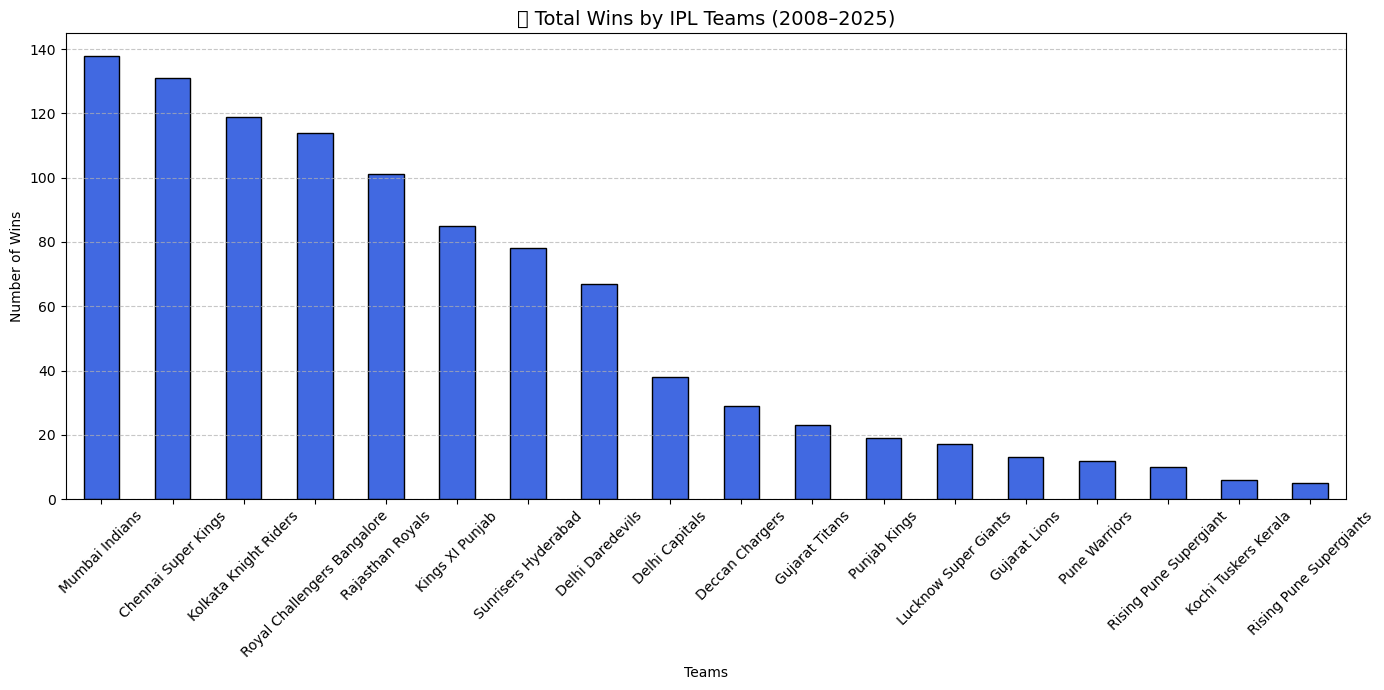

In [407]:
plt.figure(figsize=(14,7))
team_wins.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title("🏆 Total Wins by IPL Teams (2008–2025)", fontsize=14)
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 # Conclusion :
 

# Mumbai Indians is the most successful IPL team in terms of total wins, having the highest number of victories from 2008 to 2024.

# On the other hand, Kochi Tuskers Kerala has the least number of wins, as they participated in only one IPL season (2011).


# Some IPL teams like Delhi Capitals (previously Delhi Daredevils) and Punjab Kings (previously Kings XI Punjab) have undergone name changes over the years.

# In this analysis, we have standardized these names by replacing all past names with their current official names.
# This ensures that win counts are accurate and not split across different names for the same team.


# Next analysis we can do on batters based on the total runs scored in all ipl matches from 2008 to 2024

In [410]:

batters=df.groupby("Batter")["Batter Runs"].sum().sort_values(ascending=False)
 # Group Data by Batter & Sum Runs
top_batters=batters.head(15)
top_batters

Batter
V Kohli           7122
S Dhawan          6573
DA Warner         6310
RG Sharma         6165
SK Raina          5512
MS Dhoni          5082
AB de Villiers    5001
RV Uthappa        4941
CH Gayle          4875
KD Karthik        4408
AT Rayudu         4348
AM Rahane         4254
G Gambhir         4172
F du Plessis      4133
KL Rahul          4053
Name: Batter Runs, dtype: int64

C:\Users\VARUN\AppData\Local\Temp\ipykernel_8048\990465603.py:9: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


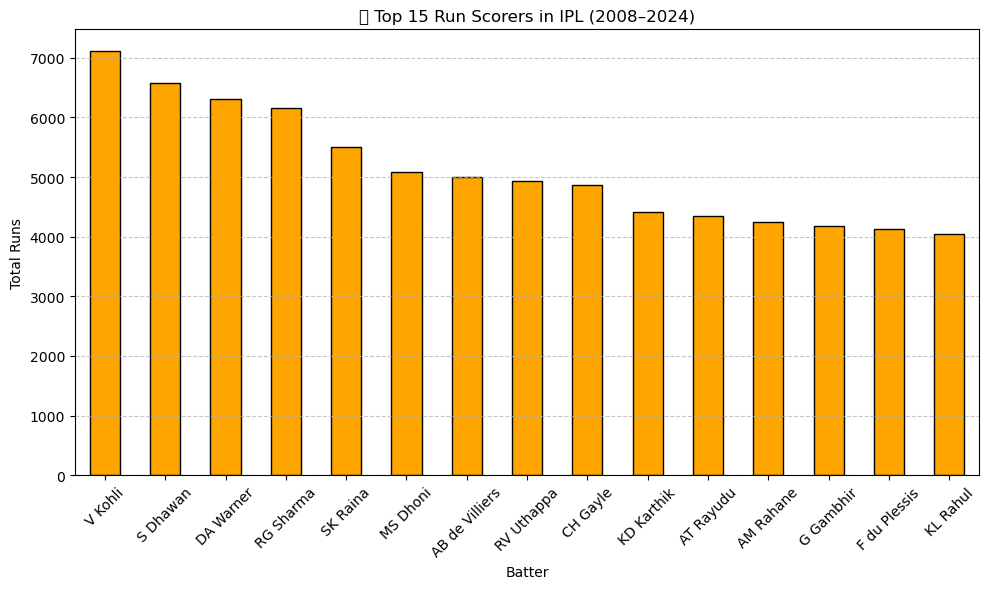

In [411]:
plt.figure(figsize=(10,6))
top_batters.plot(kind="bar", color="orange", edgecolor="black")

plt.title("🏏 Top 15 Run Scorers in IPL (2008–2024)")
plt.xlabel("Batter")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#  From the analysis of IPL data between 2008 to 2024, we can conclude that Virat Kohli is the top batter with 7000+ total runs,
#  making him the highest run scorer in IPL history during this period.

#  The remaining top 15 batters also include consistent performers who have significantly contributed to their teams over the years.
#  Most of them are top-order batters, and Indian players clearly dominate the list.


  # Next we can do Bowlers analysis

In [414]:
print(df["Wicket"].unique())


[0 1]


# In the dataset, the Wicket column uses binary values:

# 0 indicates no wicket was taken on that delivery.

# 1 indicates a wicket was taken.

# For analyzing top bowlers and calculating total wickets, 
# we need to filter only the deliveries where Wicket == 1, as those represent actual dismissals.

In [416]:
df[df["Wicket"] == 1]


,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
44,44,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,8,3,RD Gaikwad,...,Chennai Super Kings,0,0,38,0,25,35.0,20.0,0,1
72,72,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,13,1,DP Conway,...,Chennai Super Kings,0,0,18,0,13,56.0,40.0,0,1
106,106,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,18,3,S Dube,...,Chennai Super Kings,0,0,51,0,25,50.0,21.0,0,1
119,119,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,20,4,RA Jadeja,...,Chennai Super Kings,0,0,71,0,30,18.0,8.0,0,1
126,126,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,1,4,SP Narine,...,Chennai Super Kings,0,0,1,0,1,0.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239545,239545,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,1,17,1,NV Ojha,...,Sunrisers Hyderabad,1,0,18,0,19,1.0,4.0,0,1
239549,239549,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,1,17,5,RR Pant,...,Sunrisers Hyderabad,1,0,1,0,3,18.0,20.0,0,1
239624,239624,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,2,9,6,AD Hales,...,Sunrisers Hyderabad,1,0,28,0,24,45.0,31.0,0,1
239637,239637,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,2,11,6,S Dhawan,...,Sunrisers Hyderabad,1,0,4,0,6,33.0,31.0,0,1


C:\Users\VARUN\AppData\Local\Temp\ipykernel_17424\4268394248.py:16: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


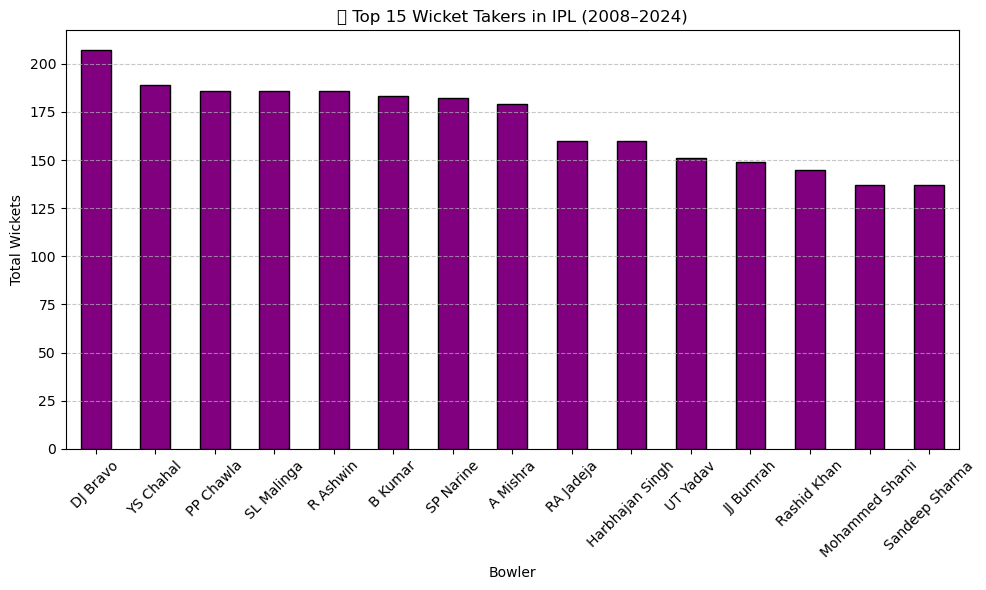

In [2]:
# Filter rows where a wicket was taken (Wicket == 1)
bowler_wickets = df[df["Wicket"] == 1].groupby("Bowler")["Wicket"].count()

# Sort and get top 15 wicket takers
top_bowlers = bowler_wickets.sort_values(ascending=False).head(15)

# Plot the result
plt.figure(figsize=(10,6))
top_bowlers.plot(kind="bar", color="purple", edgecolor="black")

plt.title("🎯 Top 15 Wicket Takers in IPL (2008–2024)")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#  Conclusion:
# From the above graph, we can conclude that Dwayne Bravo is the top wicket-taker in IPL history from 2008 to 2024, with over 200 wickets to his name. 
# His performance clearly stands out among other top bowlers like Yuzvendra Chahal, Piyush Chawla, Lasith Malinga, and Ravichandran Ashwin, 
# who also maintained impressive consistency throughout their IPL careers. These bowlers have been vital match-winners and game-changers for their teams.

# next we can find out  Top 10 Players with Most Sixes and Fours in IPL

In [420]:
df.columns

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [421]:
# Filter sixes and fours based on Batter Runs
sixes = df[df['Batter Runs'] == 6].groupby('Batter').size()
fours = df[df['Batter Runs'] == 4].groupby('Batter').size()

# Combine into a single DataFrame
boundaries = pd.DataFrame({
    'Sixes': sixes,
    'Fours': fours
}).fillna(0).astype(int)

# ➕ Add total boundaries column
boundaries['Total Boundaries'] = boundaries['Sixes'] + boundaries['Fours']

# 🔽 Sort by total boundaries and show top 10
top_boundaries = boundaries.sort_values(by='Total Boundaries', ascending=False).head(10)

# Show it
top_boundaries


,Sixes,Fours,Total Boundaries
Batter,,,
S Dhawan,148,745,893
V Kohli,230,631,861
DA Warner,224,637,861
RG Sharma,257,547,804
CH Gayle,348,401,749
SK Raina,202,506,708
RV Uthappa,182,479,661
AB de Villiers,245,395,640
MS Dhoni,239,349,588


C:\Users\VARUN\AppData\Local\Temp\ipykernel_8048\67347766.py:15: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


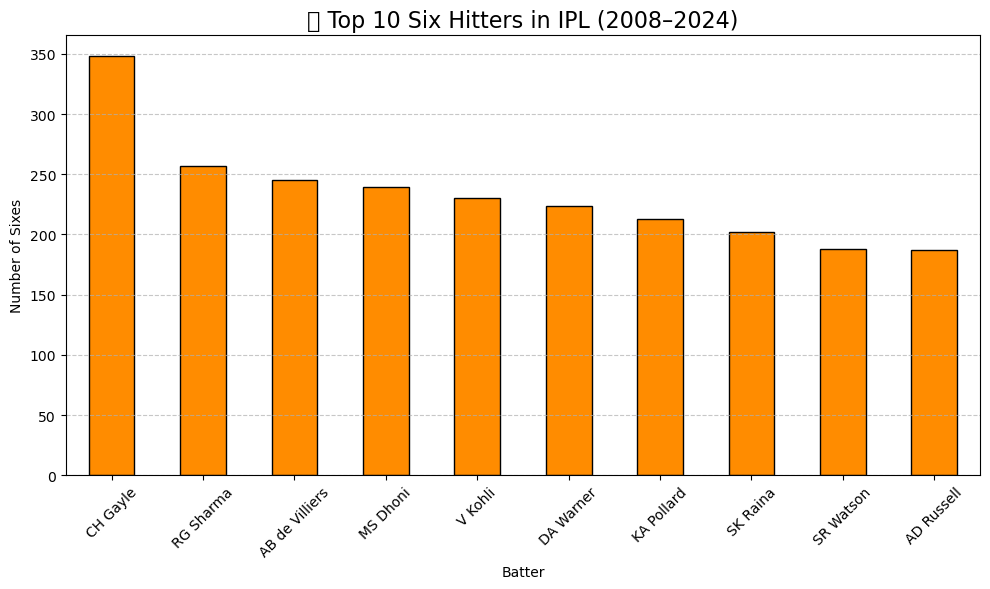

In [422]:
# Top 10 six hitters in ipl
import matplotlib.pyplot as plt

# Top 10 Six Hitters
top_sixers = boundaries.sort_values(by='Sixes', ascending=False).head(10)

plt.figure(figsize=(10,6))
top_sixers['Sixes'].plot(kind='bar', color='darkorange', edgecolor='black')

plt.title('🔥 Top 10 Six Hitters in IPL (2008–2024)', fontsize=16)
plt.xlabel('Batter')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\VARUN\AppData\Local\Temp\ipykernel_8048\3738945196.py:12: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


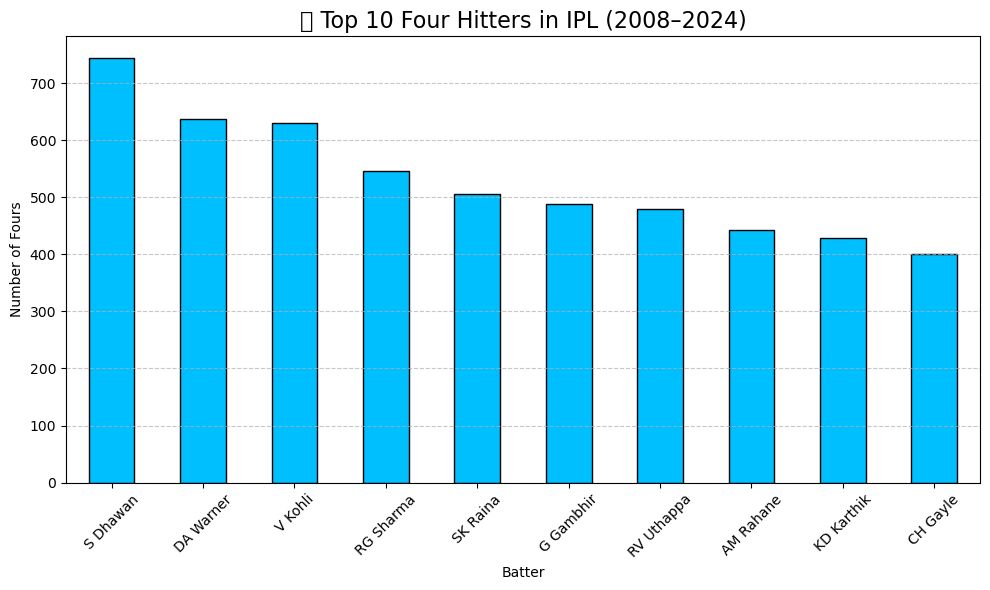

In [423]:
# Top 10 Four Hitters
top_fours = boundaries.sort_values(by='Fours', ascending=False).head(10)

plt.figure(figsize=(10,6))
top_fours['Fours'].plot(kind='bar', color='deepskyblue', edgecolor='black')

plt.title('🎯 Top 10 Four Hitters in IPL (2008–2024)', fontsize=16)
plt.xlabel('Batter')
plt.ylabel('Number of Fours')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#  Final Conclusion: Boundary Kings of IPL (2008–2024)
# Fom our analysis of the IPL data, we can draw some exciting insights into the players who dominated the game through boundaries—both fours and sixes.
#  Top Six Hitters:
#  Chris Gayle – No surprise here! The Universe Boss leads the chart with the most sixes in IPL history. His explosive batting style and ability to clear the rope with ease made him the undisputed king of sixes.

# AB de Villiers – Mr. 360 was a treat to watch, delivering innovative shots and launching sixes in every direction. A perfect blend of power and creativity.

# Rohit Sharma – Hitman not only leads Mumbai Indians as a captain but is also among the top six-hitters with his effortless timing and pull shots.

# MS Dhoni – The Captain Cool made a massive impact during the death overs with his six-hitting ability under pressure.

# Kieron Pollard – A powerhouse who smashed sixes for fun, especially in crunch moments for MI.

# Top Four Hitters:
# Shikhar Dhawan – Leads the four-hitting chart. His classic cover drives and smart placement made him the king of boundaries.

# Virat Kohli – Known for his fitness and aggressive intent, Kohli racked up tons of boundaries through pure timing and placement.

# David Warner – A destructive opener who consistently pierced the infield and dominated the powerplays with his aggressive strokeplay.

# Suresh Raina – Mr. IPL was a reliable middle-order batter, always chipping in with a steady flow of boundaries.

# KL Rahul – Elegant yet aggressive, Rahul has been consistent in finding the boundary ropes, especially in the last few seasons.

#  next we can find  Most Valuable Players (MVP-style All-Rounder Analysis) 
#  We'll combine both batting and bowling contributions to find the top all-rounders in IPL from 2008–2024.

In [426]:
df.columns

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [427]:
#  Step 1: Get total runs for all batters:
batting_stats = df.groupby("Batter")["Batter Runs"].sum()
batting_stats

Batter
A Ashish Reddy     266
A Badoni           340
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yashpal Singh       27
Younis Khan          3
Yudhvir Singh        1
Yuvraj Singh      2696
Z Khan             117
Name: Batter Runs, Length: 637, dtype: int64

In [428]:
#step 2: Get total wickets for all bowlers:
bowling_stats = df[df["Wicket"] == 1].groupby("Bowler")["Wicket"].count()
bowling_stats

Bowler
A Ashish Reddy     18
A Badoni            2
A Chandila         11
A Choudhary         5
A Flintoff          2
                 ... 
Yash Dayal         15
Yash Thakur        15
Yudhvir Singh       3
Yuvraj Singh       38
Z Khan            119
Name: Wicket, Length: 433, dtype: int64

In [429]:
 # Step 3: Merge both into one DataFrame:
mvp_df = pd.DataFrame({
    "Runs": batting_stats,
    "Wickets": bowling_stats
}).fillna(0)  
# Fill NaN with 0 for players who have only batted or bowled
mvp_df

,Runs,Wickets
A Ashish Reddy,266.0,18.0
A Badoni,340.0,2.0
A Chandila,4.0,11.0
A Chopra,53.0,0.0
A Choudhary,25.0,5.0
...,...,...
Yashpal Singh,27.0,0.0
Younis Khan,3.0,0.0
Yudhvir Singh,1.0,3.0
Yuvraj Singh,2696.0,38.0


In [430]:
#  Step 4: Calculate MVP Score:
mvp_df["MVP Score"] = mvp_df["Runs"] + (mvp_df["Wickets"] * 20)

mvp_df


,Runs,Wickets,MVP Score
A Ashish Reddy,266.0,18.0,626.0
A Badoni,340.0,2.0,380.0
A Chandila,4.0,11.0,224.0
A Chopra,53.0,0.0,53.0
A Choudhary,25.0,5.0,125.0
...,...,...,...
Yashpal Singh,27.0,0.0,27.0
Younis Khan,3.0,0.0,3.0
Yudhvir Singh,1.0,3.0,61.0
Yuvraj Singh,2696.0,38.0,3456.0


In [431]:
 # Step 5: Sort and get top MVPs:
top_mvp = mvp_df.sort_values("MVP Score", ascending=False).head(10)
top_mvp



,Runs,Wickets,MVP Score
V Kohli,7122.0,5.0,7222.0
S Dhawan,6573.0,4.0,6653.0
RG Sharma,6165.0,16.0,6485.0
DA Warner,6310.0,0.0,6310.0
SK Raina,5512.0,30.0,6112.0
SR Watson,3796.0,106.0,5916.0
RA Jadeja,2642.0,160.0,5842.0
DJ Bravo,1560.0,207.0,5700.0
CH Gayle,4875.0,19.0,5255.0
MS Dhoni,5082.0,0.0,5082.0


C:\Users\VARUN\AppData\Local\Temp\ipykernel_8048\52390817.py:15: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


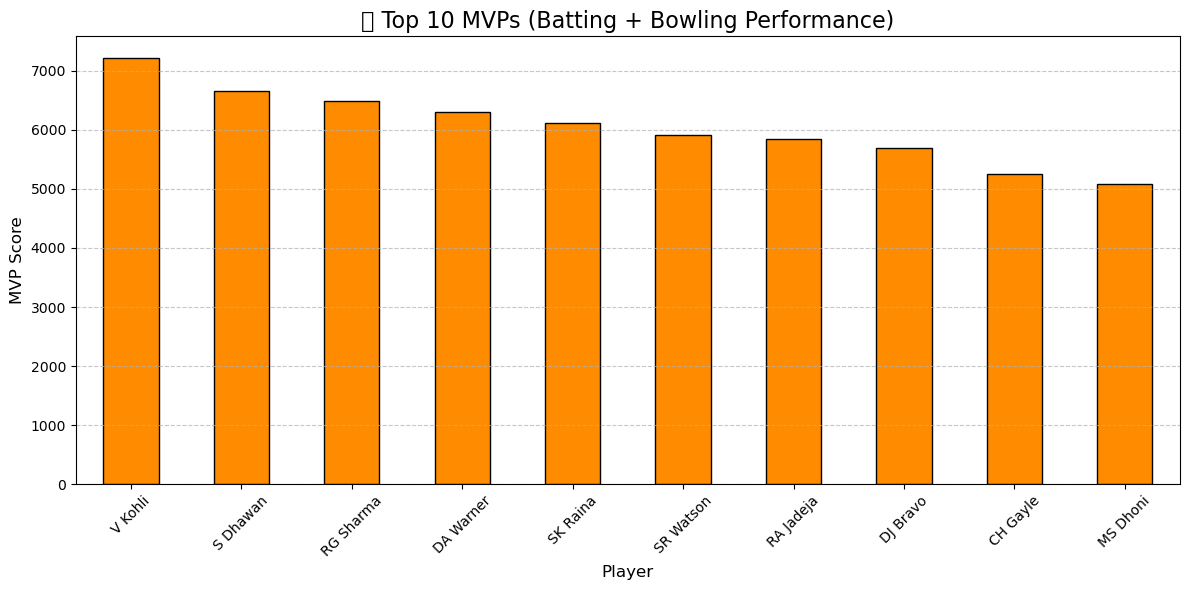

In [432]:
#ploting graph
# Plot MVP Score chart
plt.figure(figsize=(12,6))
top_mvp['MVP Score'].plot(
    kind='bar',
    color='darkorange',
    edgecolor='black'
)

plt.title("🏆 Top 10 MVPs (Batting + Bowling Performance)", fontsize=16)
plt.xlabel("Player", fontsize=12)
plt.ylabel("MVP Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#  Final Conclusion :
# Based on the MVP (Most Valuable Player) analysis combining both batting and bowling performance from 2008 to 2024 IPL seasons, 
# Virat Kohli stands out as the top all-round performer, showcasing exceptional consistency and impact.

# Shikhar Dhawan closely follows in second place, making a strong mark with his consistent batting performances.

# While some players in the top list may have contributed primarily with the bat,
# their inclusion highlights the sheer volume and quality of their performance across multiple seasons.

#  next we are trying to get the top players who have more centuries and half centuries

In [435]:
 # Step 1: Get Total Runs per Player per Match
# We want to know how much each player scored per match, not total across all matches.
# Group by Match ID and Batter to get runs per match per player

player_match_scores = df.groupby(["Match ID", "Batter"])["Batter Runs"].sum().reset_index()
player_match_scores

,Match ID,Batter,Batter Runs
0,335982,AA Noffke,9
1,335982,B Akhil,0
2,335982,BB McCullum,158
3,335982,CL White,6
4,335982,DJ Hussey,12
...,...,...,...
15130,1370353,RD Gaikwad,26
15131,1370353,Rashid Khan,0
15132,1370353,S Dube,32
15133,1370353,Shubman Gill,39


In [436]:
#  Step 2: Classify 50s and 100s
# Create columns for 50s and 100s
player_match_scores["50s"] = player_match_scores["Batter Runs"].apply(lambda x: 1 if 50 <= x < 100 else 0)
player_match_scores["100s"] = player_match_scores["Batter Runs"].apply(lambda x: 1 if x >= 100 else 0)


#  Step 3: Count Total 50s and 100s for Each Player

In [438]:
fifty_century_counts = player_match_scores.groupby("Batter")[["50s", "100s"]].sum().sort_values(by="100s", ascending=False)


# Step 4: View Top Performers

In [440]:
top10=fifty_century_counts.head(10)  # Top 10 batters with most 100s
top10


,50s,100s
Batter,,
V Kohli,49,7
CH Gayle,31,6
JC Buttler,19,5
DA Warner,61,4
SR Watson,21,4
KL Rahul,32,4
AB de Villiers,38,3
SV Samson,20,3
Shubman Gill,18,3


# step 5: next we can plot a bar graph of this

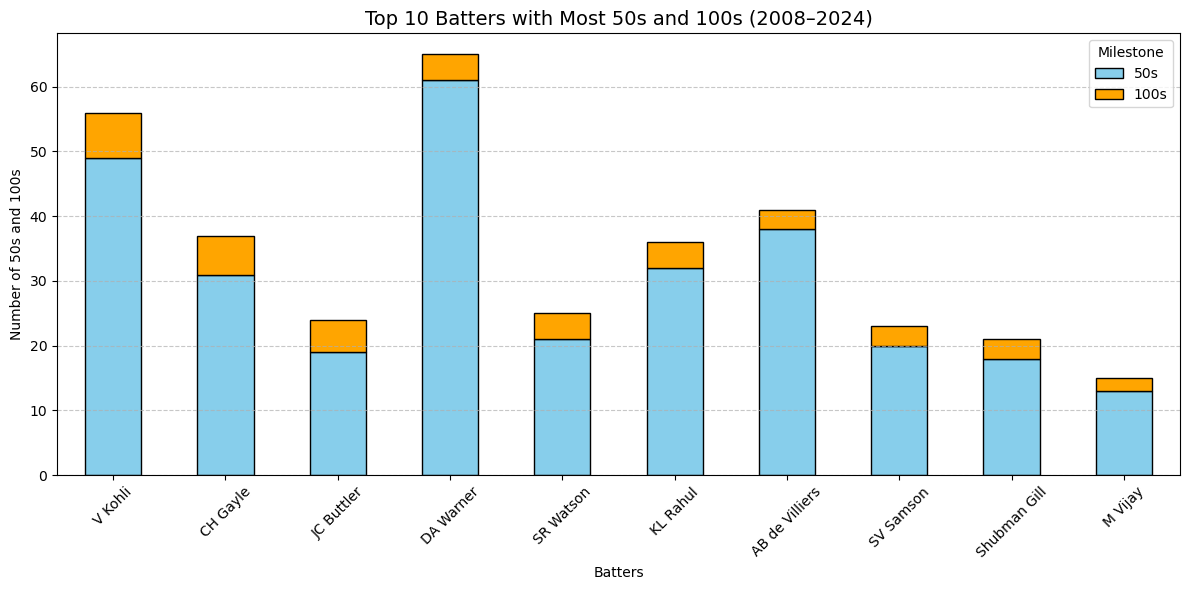

In [442]:
import matplotlib.pyplot as plt
top10.plot(kind='bar', stacked=True, figsize=(12,6), color=["skyblue", "orange"], edgecolor='black')
plt.title("Top 10 Batters with Most 50s and 100s (2008–2024)", fontsize=14)
plt.xlabel("Batters")
plt.ylabel("Number of 50s and 100s")
plt.xticks(rotation=45)
plt.legend(title="Milestone")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#  Conclusion: Most 50s and 100s by Batters (2008–2024)
# Virat Kohli stands out as the most consistent and dominant batter in IPL history with the highest number of centuries (7) and 49 half-centuries.

#  David Warner holds the record for the most number of half-centuries (61), showing his consistency at the top order.

# Chris Gayle, the Universe Boss, follows closely with 6 centuries, proving his power-hitting impact.
# Players like Buttler, Rahul, and AB de Villiers have also delivered match-winning performances consistently with multiple 50s and 100s.

In [444]:
df.columns

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

# next we can do  Consistent Batters analysis


# We'll use Standard Deviation (SD) of runs per match for each batter.

# Low SD = runs are close to average → consistent performer 

# High SD = more fluctuation → explosive but unpredictable 



 # Step 1: Group batter scores per match

In [449]:
# Total runs scored by each batter in each match
batter_match_runs = df.groupby(['Match ID', 'Batter'])['Batter Runs'].sum().reset_index()
batter_match_runs

,Match ID,Batter,Batter Runs
0,335982,AA Noffke,9
1,335982,B Akhil,0
2,335982,BB McCullum,158
3,335982,CL White,6
4,335982,DJ Hussey,12
...,...,...,...
15130,1370353,RD Gaikwad,26
15131,1370353,Rashid Khan,0
15132,1370353,S Dube,32
15133,1370353,Shubman Gill,39


 # Step 2: Calculate mean and standard deviation

In [451]:
# Now calculate mean and std deviation per batter
batter_stats = batter_match_runs.groupby('Batter')['Batter Runs'].agg(['mean', 'std', 'count']).reset_index()
batter_stats.columns = ['Batter', 'Avg Runs', 'SD Runs', 'Matches']
batter_stats

,Batter,Avg Runs,SD Runs,Matches
0,A Ashish Reddy,12.090909,9.075918,22
1,A Badoni,15.454545,13.720778,22
2,A Chandila,2.000000,2.828427,2
3,A Chopra,8.833333,9.020347,6
4,A Choudhary,8.333333,5.859465,3
...,...,...,...,...
632,Yashpal Singh,9.000000,3.605551,3
633,Younis Khan,3.000000,NaN,1
634,Yudhvir Singh,0.500000,0.707107,2
635,Yuvraj Singh,21.741935,18.372775,124



#  Step 3: Filter batters with enough matches (e.g., 50+)

In [453]:
consistent_batters = batter_stats[batter_stats['Matches'] >= 50]
consistent_batters

,Batter,Avg Runs,SD Runs,Matches
9,A Mishra,6.927273,7.564181,55
27,AB de Villiers,30.126506,27.683749,166
29,AC Gilchrist,25.862500,24.645714,80
36,AD Russell,23.559140,20.909984,93
40,AJ Finch,23.170455,21.867007,88
...,...,...,...,...
599,V Sehwag,26.490196,27.685198,102
617,WP Saha,20.863636,20.907566,132
624,Y Venugopal Rao,19.313725,16.242525,51
627,YK Pathan,20.802632,19.484767,152


 #  Step 4: Sort by SD to find most consistent

In [455]:
consistent_batters = consistent_batters.sort_values(by='SD Runs', ascending=True).reset_index(drop=True)
consistent_batters

,Batter,Avg Runs,SD Runs,Matches
0,B Kumar,4.716667,5.621061,60
1,PP Chawla,7.649351,6.694000,77
2,P Kumar,5.964912,6.899702,57
3,A Mishra,6.927273,7.564181,55
4,R Ashwin,8.962025,10.508169,79
...,...,...,...,...
88,DA Warner,36.686047,29.342009,172
89,RD Gaikwad,35.235294,29.592964,51
90,KL Rahul,38.600000,30.264094,105
91,JC Buttler,34.191489,31.207001,94


 # Step 5: Show Top 10 Consistent Batters
 

In [457]:
consistent_batters[['Batter', 'Matches', 'Avg Runs', 'SD Runs']].head(10)


,Batter,Matches,Avg Runs,SD Runs
0,B Kumar,60,4.716667,5.621061
1,PP Chawla,77,7.649351,6.694000
2,P Kumar,57,5.964912,6.899702
3,A Mishra,55,6.927273,7.564181
4,R Ashwin,79,8.962025,10.508169
5,Harbhajan Singh,87,9.574713,11.752914
6,RA Jadeja,167,15.820359,11.950856
7,STR Binny,64,13.562500,12.128773
8,AM Nayar,50,13.440000,12.257709
9,IK Pathan,79,13.658228,12.301643


# ploting Bar  graph

C:\Users\VARUN\AppData\Local\Temp\ipykernel_8048\267393556.py:12: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


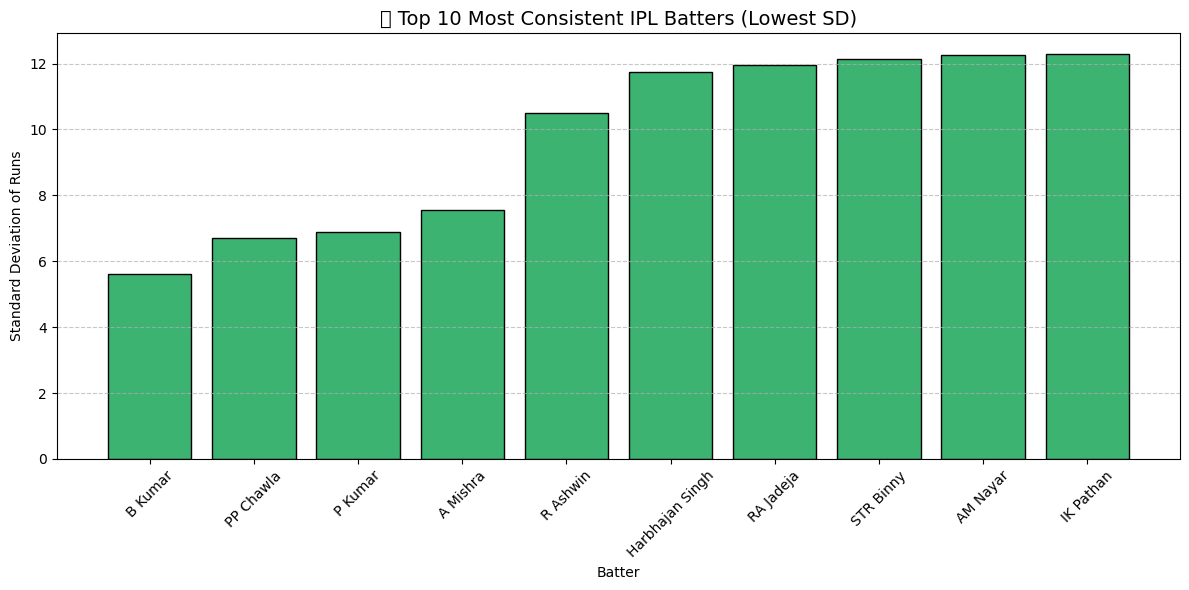

In [459]:
import matplotlib.pyplot as plt

top10 = consistent_batters.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['Batter'], top10['SD Runs'], color='mediumseagreen', edgecolor='black')
plt.title("🔁 Top 10 Most Consistent IPL Batters (Lowest SD)", fontsize=14)
plt.xlabel("Batter")
plt.ylabel("Standard Deviation of Runs")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# In this analysis, we evaluated the consistency of IPL batters by calculating the standard deviation (SD) of runs scored per match. 
# A lower SD indicates that the player scores at a more stable and predictable rate across matches, showcasing consistency — even if the runs aren't always high.

#  Key Findings:
# Bhuvneshwar Kumar emerged as the most consistent batter, with the lowest standard deviation (5.62) across 60 matches. 
# Despite being a lower-order batter, his performance was remarkably stable in terms of run contribution.

# Piyush Chawla secured the 2nd position, with an SD of 6.69 over 77 matches, indicating similar reliability.

# Players like P Kumar, A Mishra, and R Ashwin also demonstrated low run fluctuation, placing them in the top 5 most consistent batters.



# Note: Consistency here refers to how steady a player’s performance is, not necessarily high scores.
# Many of these players are bowling all-rounders or lower-order batters, whose contributions are small but stable.

# next we can do same on Consistency Analysis on Bowlers 

# Find bowlers who are most consistent at taking wickets across matches — lower SD means they perform steadily.



 # Step 1: Group by Match and Bowler, then Sum Wickets

In [465]:
bowler_match_wickets = df.groupby(['Match ID', 'Bowler'])['Wicket'].sum().reset_index()
bowler_match_wickets

,Match ID,Bowler,Wicket
0,335982,AA Noffke,1
1,335982,AB Agarkar,3
2,335982,AB Dinda,2
3,335982,CL White,0
4,335982,I Sharma,1
...,...,...,...
11914,1370353,Mohammed Shami,0
11915,1370353,Noor Ahmad,2
11916,1370353,RA Jadeja,1
11917,1370353,Rashid Khan,0


#  Step 2: Group by Bowler to Calculate Metrics

In [467]:
bowler_stats = bowler_match_wickets.groupby('Bowler')['Wicket'].agg(['count', 'mean', 'std']).reset_index()
bowler_stats.columns = ['Bowler', 'Matches', 'Avg Wickets', 'SD Wickets']
bowler_stats
# count = number of matches played (with at least one delivery bowled)

# mean = average wickets per match

# std = standard deviation of wickets (lower = more consistent

,Bowler,Matches,Avg Wickets,SD Wickets
0,A Ashish Reddy,19,0.947368,0.848115
1,A Badoni,3,0.666667,0.577350
2,A Chandila,12,0.916667,1.240112
3,A Choudhary,5,1.000000,0.707107
4,A Dananjaya,1,0.000000,NaN
...,...,...,...,...
497,Yash Dayal,14,1.071429,1.071612
498,Yash Thakur,9,1.666667,1.414214
499,Yudhvir Singh,3,1.000000,1.000000
500,Yuvraj Singh,71,0.535211,0.997583


#  Step 3: Sort by Consistency (Lowest SD First)

In [469]:
bowler_stats = bowler_stats.sort_values(by='SD Wickets').dropna().reset_index(drop=True) # dropna() removes any entries with missing values (just in case).
bowler_stats


,Bowler,Matches,Avg Wickets,SD Wickets
0,M Manhas,3,0.000000,0.000000
1,Rasikh Salam,3,0.000000,0.000000
2,M Vijay,4,0.000000,0.000000
3,C Munro,2,0.000000,0.000000
4,Mandeep Singh,2,0.000000,0.000000
...,...,...,...,...
436,Shoaib Akhtar,3,1.666667,2.081666
437,A Uniyal,2,1.500000,2.121320
438,RS Hangargekar,2,1.500000,2.121320
439,SM Boland,2,1.500000,2.121320


#  Step 4: View Top 10 Most Consistent Bowlers

In [471]:
print(bowler_stats.head(10))


          Bowler  Matches  Avg Wickets  SD Wickets
0       M Manhas        3          0.0         0.0
1   Rasikh Salam        3          0.0         0.0
2        M Vijay        4          0.0         0.0
3        C Munro        2          0.0         0.0
4  Mandeep Singh        2          0.0         0.0
5      KR Mayers        6          0.0         0.0
6  KS Williamson        2          0.0         0.0
7    Tilak Varma        3          0.0         0.0
8       MW Short        3          0.0         0.0
9       S Sriram        2          0.0         0.0


In [472]:
# we are getting error in here  we are only getting players with sd 0 only so lets fix that
# Fix: Filter out bowlers with only zero wickets
# Filter out bowlers who never took a wicket
total_wickets = bowler_match_wickets.groupby('Bowler')['Wicket'].sum().reset_index()
valid_bowlers = total_wickets[total_wickets['Wicket'] > 0]['Bowler']

# Keep only valid bowlers in the original DataFrame
bowler_match_wickets = bowler_match_wickets[bowler_match_wickets['Bowler'].isin(valid_bowlers)]


In [473]:
bowler_match_wickets 

,Match ID,Bowler,Wicket
0,335982,AA Noffke,1
1,335982,AB Agarkar,3
2,335982,AB Dinda,2
3,335982,CL White,0
4,335982,I Sharma,1
...,...,...,...
11914,1370353,Mohammed Shami,0
11915,1370353,Noor Ahmad,2
11916,1370353,RA Jadeja,1
11917,1370353,Rashid Khan,0


In [474]:
bowler_stats = bowler_match_wickets.groupby('Bowler')['Wicket'].agg(['count', 'mean', 'std']).reset_index()
bowler_stats.columns = ['Bowler', 'Matches', 'Avg Wickets', 'SD Wickets']
bowler_stats = bowler_stats.sort_values(by='SD Wickets').dropna().reset_index(drop=True)
bowler_stats 



,Bowler,Matches,Avg Wickets,SD Wickets
0,B Geeves,2,1.000000,0.000000
1,AA Jhunjhunwala,10,0.100000,0.316228
2,Swapnil Singh,7,0.142857,0.377964
3,AC Voges,7,0.142857,0.377964
4,AK Markram,12,0.166667,0.389249
...,...,...,...,...
409,Shoaib Akhtar,3,1.666667,2.081666
410,A Uniyal,2,1.500000,2.121320
411,SM Boland,2,1.500000,2.121320
412,RS Hangargekar,2,1.500000,2.121320


In [475]:
bowler_stats.head(10)


,Bowler,Matches,Avg Wickets,SD Wickets
0,B Geeves,2,1.000000,0.000000
1,AA Jhunjhunwala,10,0.100000,0.316228
2,Swapnil Singh,7,0.142857,0.377964
3,AC Voges,7,0.142857,0.377964
4,AK Markram,12,0.166667,0.389249
5,SE Rutherford,6,0.166667,0.408248
6,MK Tiwary,6,0.166667,0.408248
7,CL White,6,0.166667,0.408248
8,TM Dilshan,24,0.208333,0.414851
9,MK Lomror,10,0.200000,0.421637


#  Plot Top 10 Most Consistent Bowlers

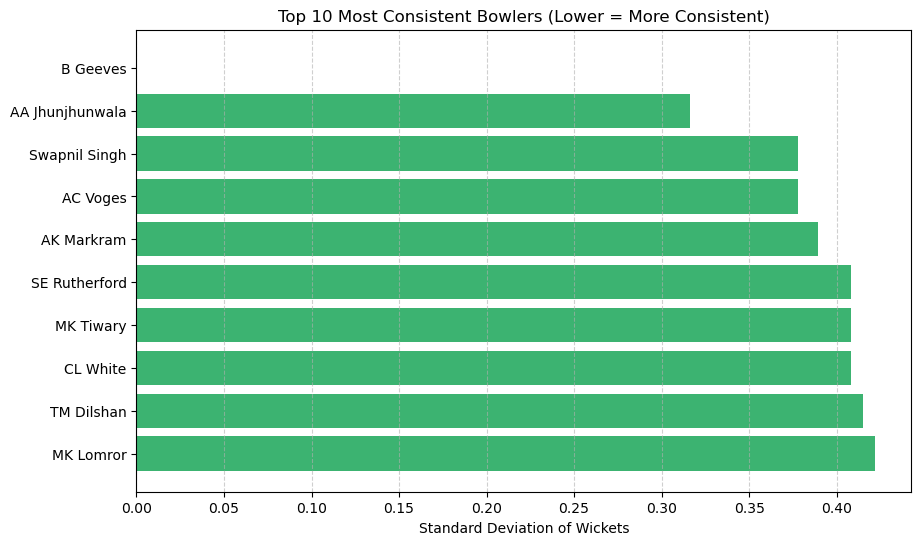

In [477]:
import matplotlib.pyplot as plt

top_consistent_bowlers = bowler_stats.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_consistent_bowlers['Bowler'], top_consistent_bowlers['SD Wickets'], color='mediumseagreen')
plt.xlabel('Standard Deviation of Wickets')
plt.title('Top 10 Most Consistent Bowlers (Lower = More Consistent)')
plt.gca().invert_yaxis()  # Highest rank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


#  Conclusion:
# B Geeves is the most consistent bowler with 0 SD and 1 wicket per match, but he has played only 2 matches, so it's a small sample size 📉.

# AA Jhunjhunwala has a low SD (0.31) across 10 matches, which shows solid consistency even with low average wickets.

# Others like Swapnil Singh, AC Voges, and AK Markram also have decent consistency across more games (7–12 matches), 
# despite taking fewer wickets per match.



# Final Summary:
# "Among bowlers who have taken at least one wicket, B Geeves showed the highest consistency with a standard deviation of 0 over 2 matches.
# However, considering bowlers who played more matches, AA Jhunjhunwala and Swapnil Singh emerge as highly consistent options with very low SD values,
# indicating stable bowling performance across games."



# so next we can Do  Venue-wise Batting/Bowling Analysis

# We're doing this because venue conditions matter a lot in cricket – each ground has unique features that affect performance.

# 1 Pitch Behavior Varies
# Some venues are batter-friendly (flat pitch, short boundaries).

# Some support bowlers (more bounce, spin, or swing).

#  Knowing this helps explain why some players do well only in certain grounds.


# getting unique venues

In [483]:
unique_venues = sorted(df["Venue"].unique())
print(unique_venues)

['Arun Jaitley Stadium', 'Barabati Stadium', 'Barsapara Cricket Stadium', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Feroz Shah Kotla', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Holkar Cricket Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium', 'M.Chinnaswamy Stadium', 'MA Chidambaram Stadium', 'Maharashtra Cricket Association Stadium', 'Narendra Modi Stadium', 'Nehru Stadium', 'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval', 'Punjab Cricket Association IS Bindra Stadium', 'Punjab Cricket Association Stadium', 'Rajiv Gandhi International Stadium', 'Sardar Patel Stadium', 'Saurashtra Cricket Association Stadium', 'Sawai Mansingh Stadium', 'Shaheed Veer Narayan Singh International Stadium', 'Sharjah Cricket

# in venuse wise analysis we are taking only few stadiums only.

# step 1 : Group by Venue and Bowler to get total wickets

In [486]:
venue_bowling = df.groupby(['Venue', 'Bowler'])['Wicket'].sum().reset_index()
venue_bowling 

,Venue,Bowler,Wicket
0,Arun Jaitley Stadium,A Mishra,18
1,Arun Jaitley Stadium,A Nortje,5
2,Arun Jaitley Stadium,AD Russell,1
3,Arun Jaitley Stadium,AJ Hosein,1
4,Arun Jaitley Stadium,AJ Tye,2
...,...,...,...
4423,Zayed Cricket Stadium,T Shamsi,0
4424,Zayed Cricket Stadium,TA Boult,1
4425,Zayed Cricket Stadium,Umran Malik,2
4426,Zayed Cricket Stadium,VR Iyer,0


# step 2:  Sort to get highest wicket-takers per venue



In [488]:
top_venue_bowlers = venue_bowling.sort_values(['Venue', 'Wicket'], ascending=[True, False]) 
top_venue_bowlers

,Venue,Bowler,Wicket
0,Arun Jaitley Stadium,A Mishra,18
106,Arun Jaitley Stadium,TA Boult,16
5,Arun Jaitley Stadium,AR Patel,11
34,Arun Jaitley Stadium,I Sharma,11
89,Arun Jaitley Stadium,Rashid Khan,9
...,...,...,...
4415,Zayed Cricket Stadium,RG Sharma,0
4419,Zayed Cricket Stadium,SM Curran,0
4422,Zayed Cricket Stadium,Shahbaz Ahmed,0
4423,Zayed Cricket Stadium,T Shamsi,0



# step 3:Get top 10 bowlers per venue

In [490]:

top_per_venue = top_venue_bowlers.groupby('Venue').head(10)
top_per_venue

,Venue,Bowler,Wicket
0,Arun Jaitley Stadium,A Mishra,18
106,Arun Jaitley Stadium,TA Boult,16
5,Arun Jaitley Stadium,AR Patel,11
34,Arun Jaitley Stadium,I Sharma,11
89,Arun Jaitley Stadium,Rashid Khan,9
...,...,...,...
4399,Zayed Cricket Stadium,M Prasidh Krishna,4
4412,Zayed Cricket Stadium,R Tewatia,4
4416,Zayed Cricket Stadium,Rashid Khan,4
4420,Zayed Cricket Stadium,SN Thakur,4


# Plot for first venue

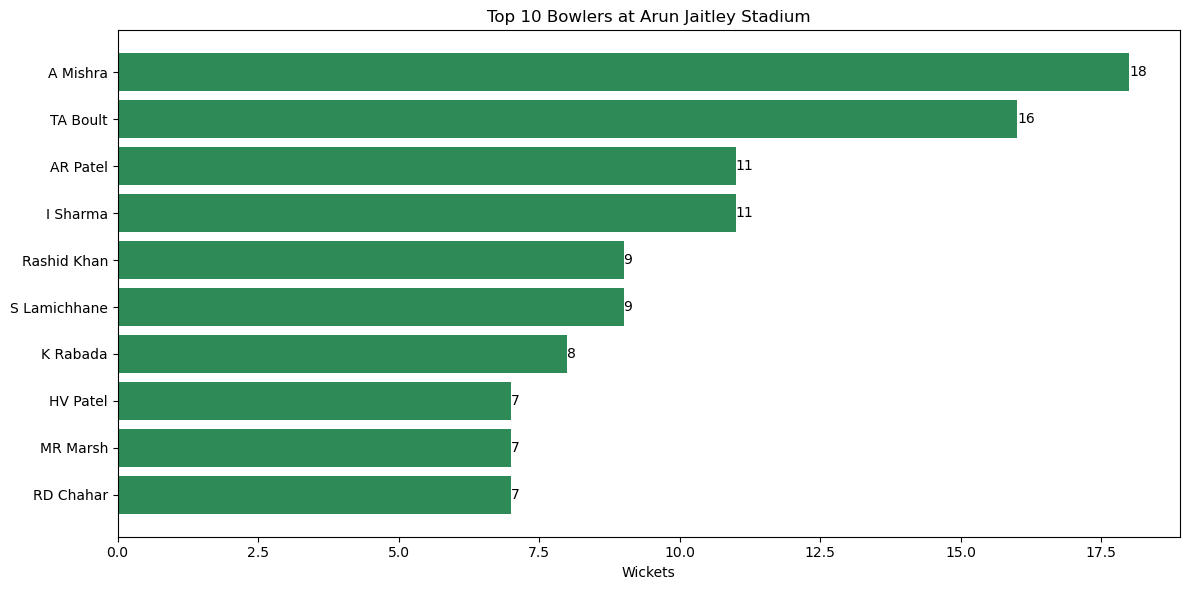

In [492]:

plt.figure(figsize=(12, 6))
venue_name = 'Arun Jaitley Stadium' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='seagreen')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  # This will display the graph

# plot for 2nd venue

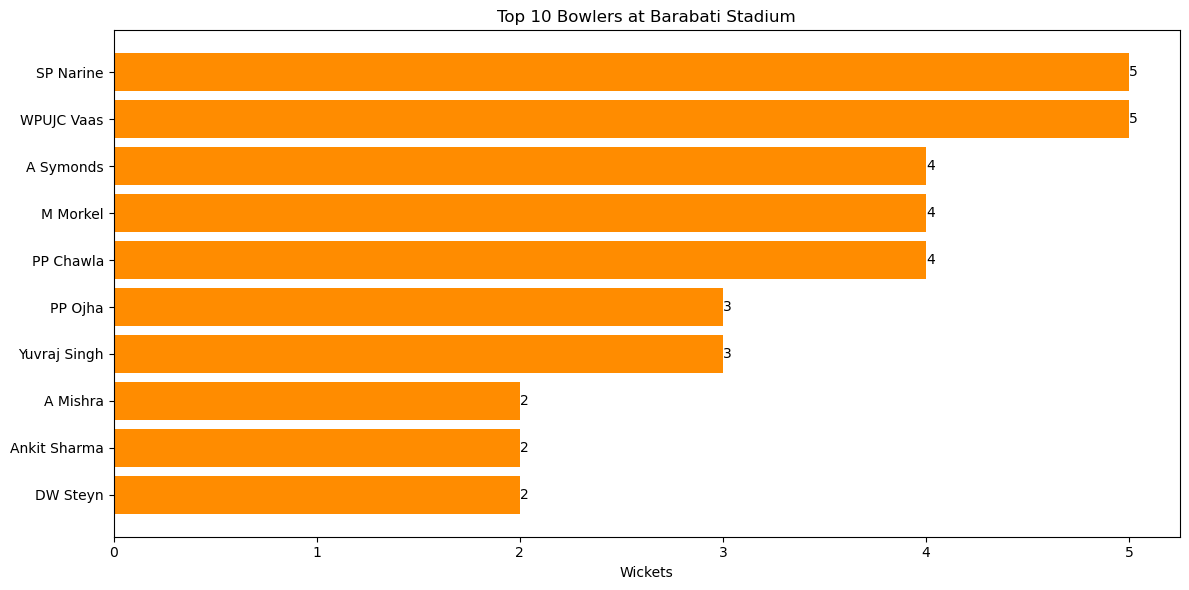

In [494]:

plt.figure(figsize=(12, 6))
venue_name = 'Barabati Stadium' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='darkorange')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  

# Insights from the Bowling Performance Graphs:

# At Arun Jaitley Stadium, the top bowlers are Amit Mishra with 18 wickets and Trent Boult with 16 wickets, showcasing strong performances at this venue.

# At Barabati Stadium, both Sunil Narine and WPUJC Vaas have emerged as the leading wicket-takers, each claiming 5 wickets.




  # plot for 3 rd venue


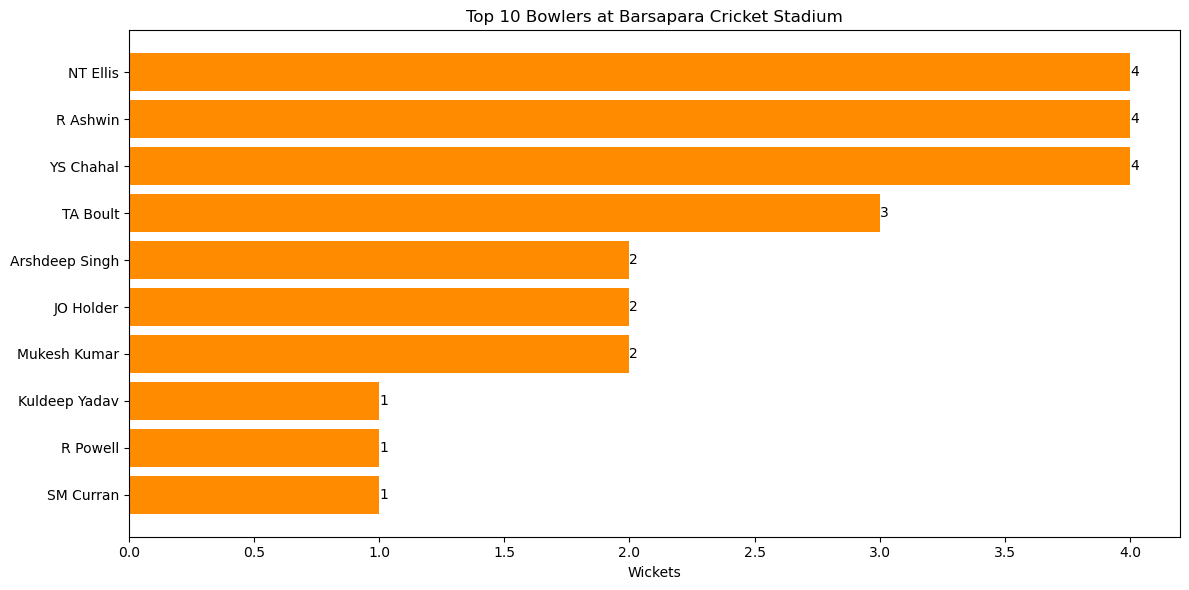

In [497]:

plt.figure(figsize=(12, 6))
venue_name = 'Barsapara Cricket Stadium'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='darkorange')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  

# plot for 4 th venue

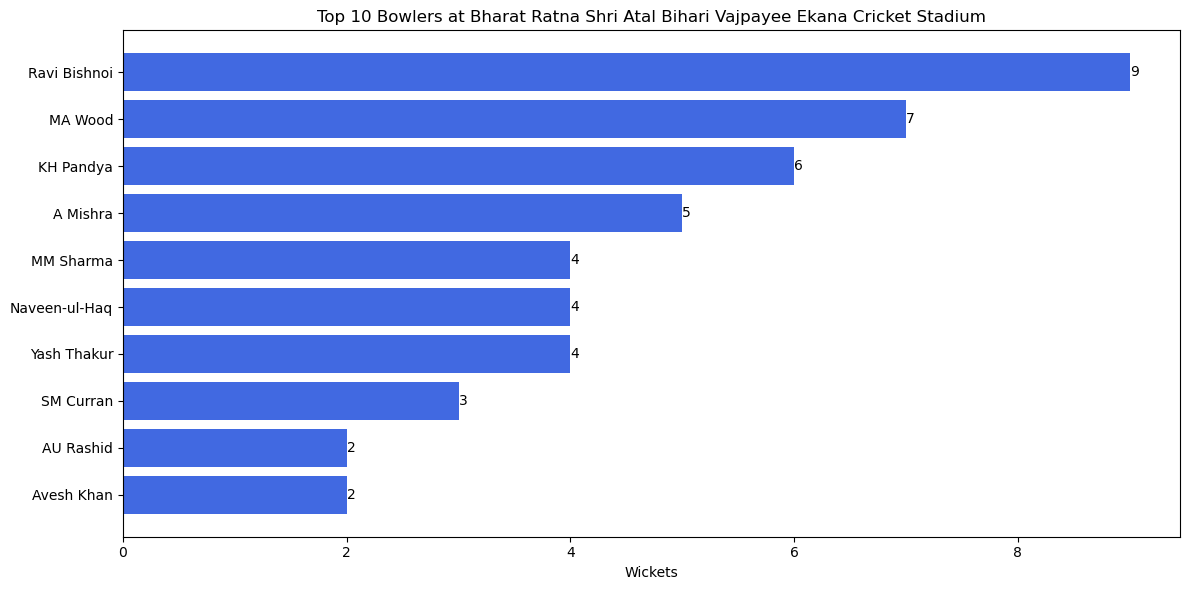

In [499]:
plt.figure(figsize=(12, 6))
venue_name = 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='royalblue')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  

 # Barsapara Cricket Stadium:
# The top bowlers here are Nathan Ellis, Ravichandran Ashwin, and Yuzvendra Chahal, each picking up 4 wickets — indicating a 
# balanced performance across different bowling styles.

# Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium:
# Ravi Bishnoi stands out with 9 wickets, followed by Mark Wood with 7 wickets, highlighting effective spin and pace combinations on this track.



# plot for 5 th and 6 th venue

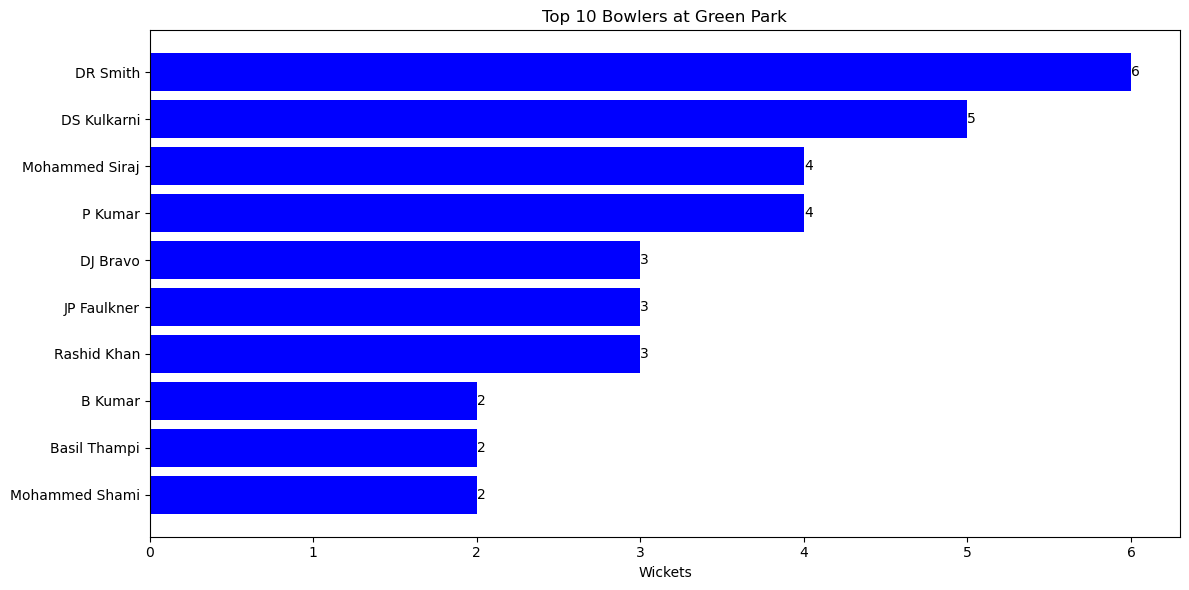

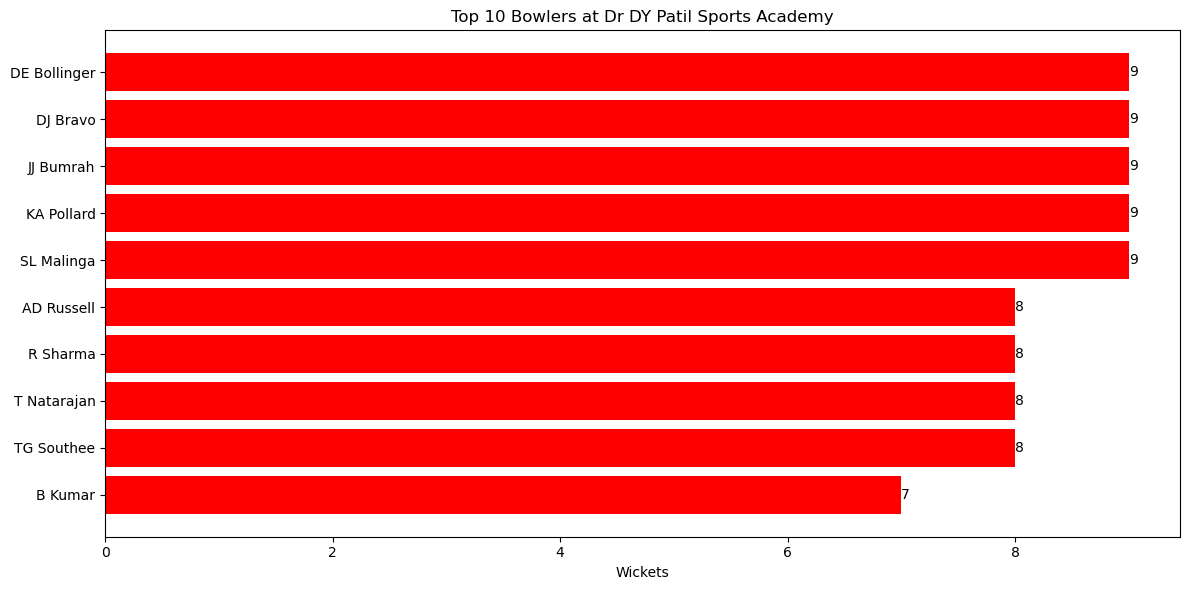

In [502]:
plt.figure(figsize=(12, 6))
venue_name = 'Green Park' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='blue')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  





plt.figure(figsize=(12, 6))
venue_name = 'Dr DY Patil Sports Academy'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='red')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  

# Green Park:
# DR Smith leads the chart with 6 wickets, followed by DS Kulkarni in second with 5 wickets. 
# Several other bowlers contributed with an average of 3–4 wickets, showing a well-rounded effort.

#  Kingsmead Stadium:
# IK Pathan tops the list with a solid 11 wickets, with Y A Abdullah coming in second with 10 wickets.
# Other bowlers made their mark with performances of 6 wickets each, indicating a strong bowling lineup.



# plot for 7th and  8 th venue

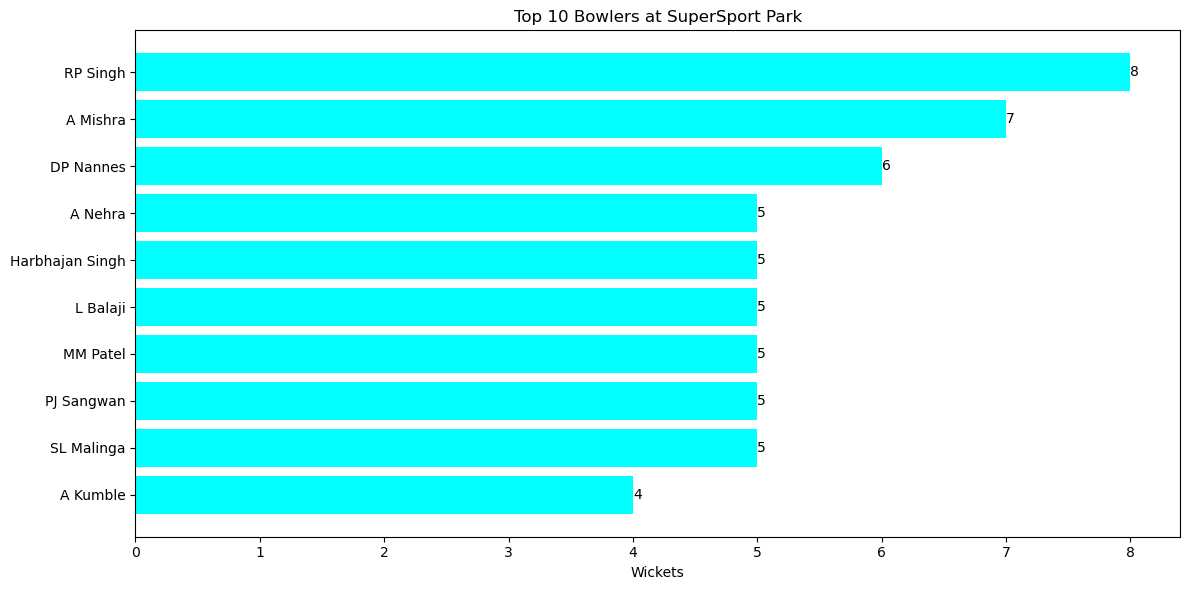

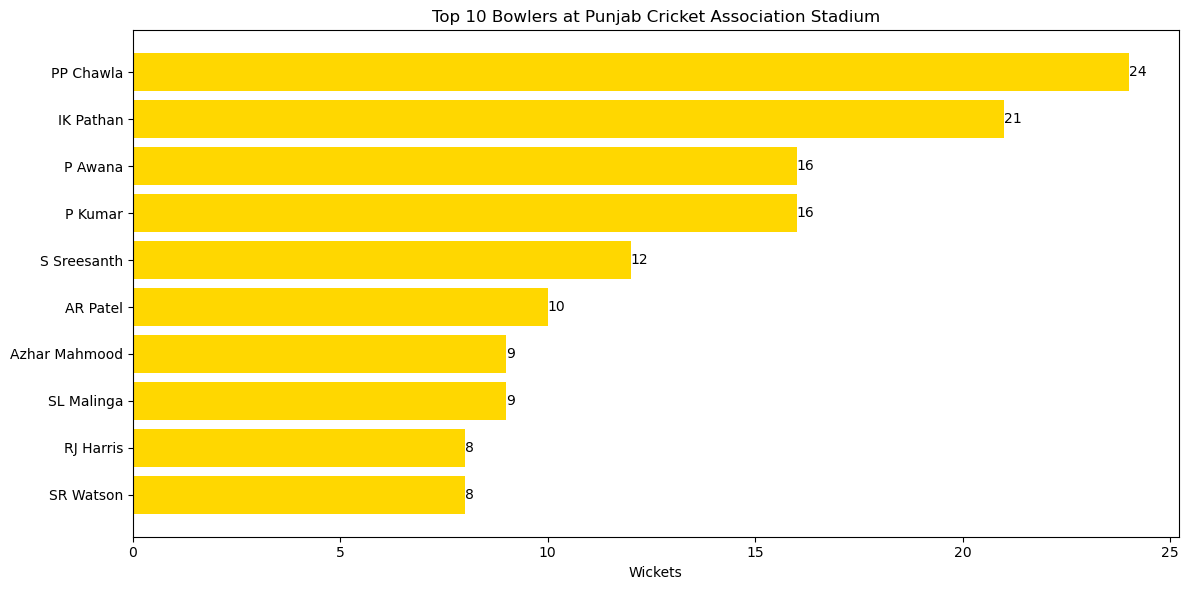

In [505]:
plt.figure(figsize=(12, 6))
venue_name = 'SuperSport Park'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='cyan')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  





plt.figure(figsize=(12, 6))
venue_name = 'Punjab Cricket Association Stadium' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='gold')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  

# SuperSport Park:
# RP Singh leads the pack with 8 wickets, followed by Amit Mishra with 7 wickets. 
# Other bowlers contributed an average of 5 wickets each, showing a well-balanced bowling effort across the team.

# Punjab Cricket Association Stadium:
# PP Chawla is the standout performer with 24 wickets, with IK Pathan following closely with 21 wickets.
# Both P Awana and P Kumar also delivered strong performances with 16 wickets each, highlighting an exceptional team effort.



# plot for 9th and  10th venue

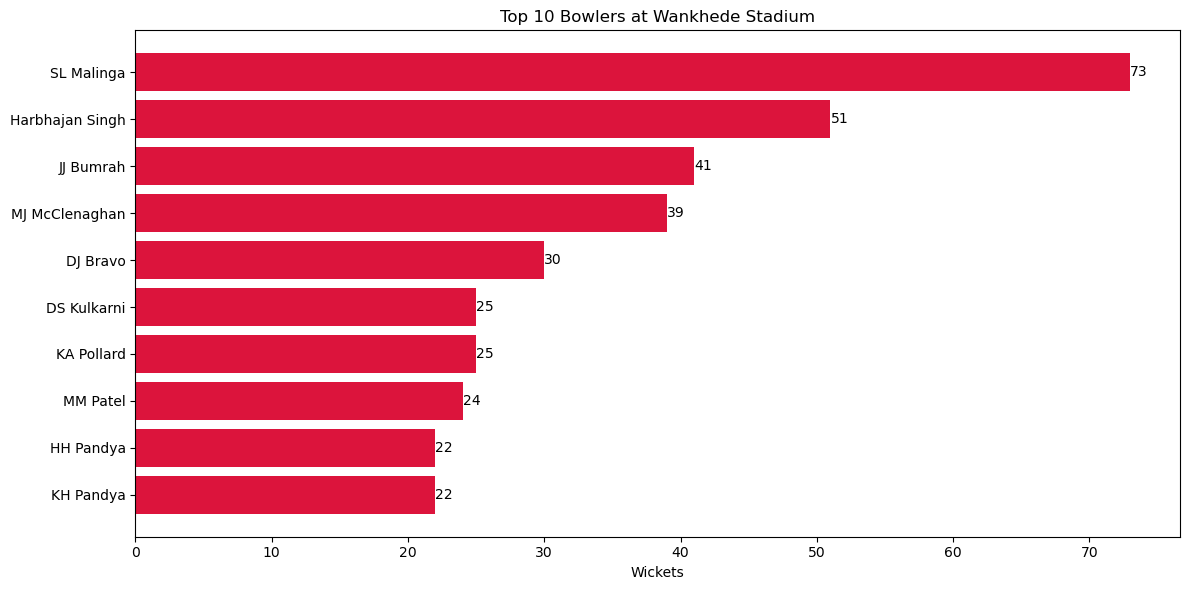

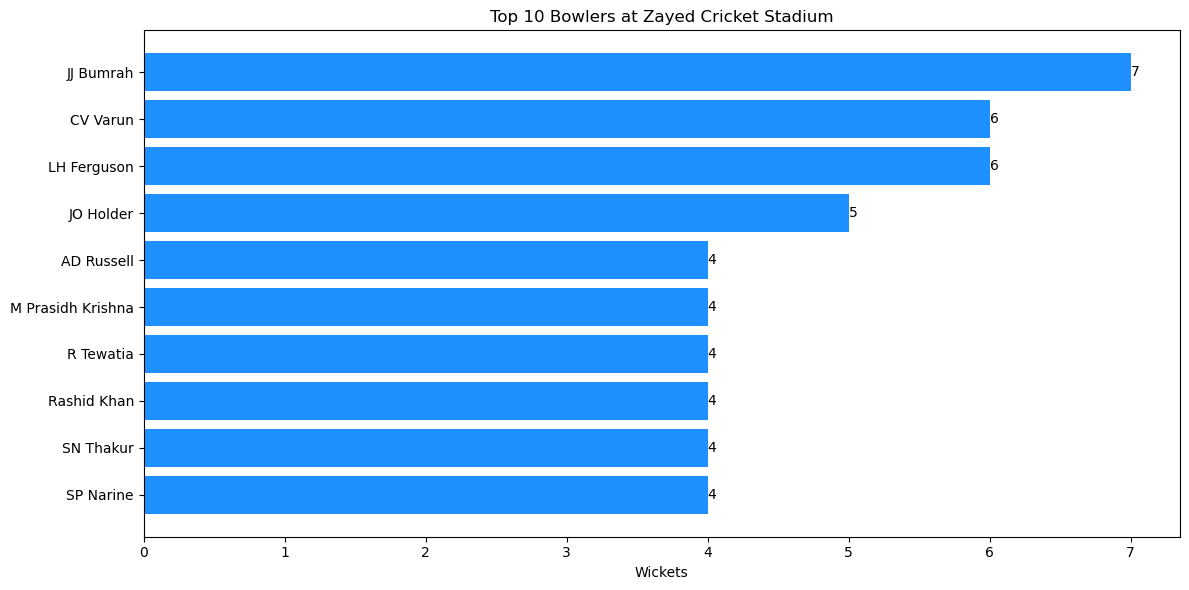

In [508]:
plt.figure(figsize=(12, 6))
venue_name = 'Wankhede Stadium'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='crimson')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  





plt.figure(figsize=(12, 6))
venue_name = 'Zayed Cricket Stadium' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Bowler'], venue_data['Wicket'], color='dodgerblue')
plt.xlabel('Wickets')
plt.title(f'Top 10 Bowlers at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Wicket']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  

# Wankhede Stadium:
# SL Malinga leads with a remarkable 73 wickets, with Harbhajan Singh securing 51 wickets. 
# Several other bowlers contributed strongly, with an average range of 20–25 wickets,showcasing excellent team depth;


# Zayed Cricket Stadium:
# Jasprit Bumrah is the top performer with 7 wickets, followed by CV Varun and Lockie Ferguson with 6 wickets each.
# Many other bowlers also contributed with 4 wickets, indicating solid performances from the squad.

# next the same venue analysis we can do on  batting performance

# step 1 : Group by Venue and Batter to get total runs

In [512]:
venue_batting = df.groupby(['Venue', 'Batter'])['Batter Runs'].sum().reset_index()
venue_batting

,Venue,Batter,Batter Runs
0,Arun Jaitley Stadium,A Mishra,7
1,Arun Jaitley Stadium,A Nortje,9
2,Arun Jaitley Stadium,AB de Villiers,89
3,Arun Jaitley Stadium,AD Hales,14
4,Arun Jaitley Stadium,AD Russell,82
...,...,...,...
5494,Zayed Cricket Stadium,V Kohli,10
5495,Zayed Cricket Stadium,VR Iyer,112
5496,Zayed Cricket Stadium,WP Saha,12
5497,Zayed Cricket Stadium,YBK Jaiswal,55


# step 2: Sort to get highest batters per venue

In [514]:
top_venue_batters = venue_batting.sort_values(['Venue', 'Batter Runs'], ascending=[True, False]) 
top_venue_batters

,Venue,Batter,Batter Runs
106,Arun Jaitley Stadium,RR Pant,467
121,Arun Jaitley Stadium,SS Iyer,449
33,Arun Jaitley Stadium,DA Warner,374
111,Arun Jaitley Stadium,S Dhawan,319
95,Arun Jaitley Stadium,PP Shaw,305
...,...,...,...
5480,Zayed Cricket Stadium,S Kaul,1
5440,Zayed Cricket Stadium,JDS Neesham,0
5465,Zayed Cricket Stadium,PP Chawla,0
5467,Zayed Cricket Stadium,PWH de Silva,0


In [515]:
# step 3:Get top 10 Batters per venue

In [516]:

top_per_venue = top_venue_batters.groupby('Venue').head(10)
top_per_venue

,Venue,Batter,Batter Runs
106,Arun Jaitley Stadium,RR Pant,467
121,Arun Jaitley Stadium,SS Iyer,449
33,Arun Jaitley Stadium,DA Warner,374
111,Arun Jaitley Stadium,S Dhawan,319
95,Arun Jaitley Stadium,PP Shaw,305
...,...,...,...
5481,Zayed Cricket Stadium,SA Yadav,87
5468,Zayed Cricket Stadium,Q de Kock,82
5442,Zayed Cricket Stadium,JJ Roy,78
5492,Zayed Cricket Stadium,Shubman Gill,70


# graph for 1st and 2nd venue

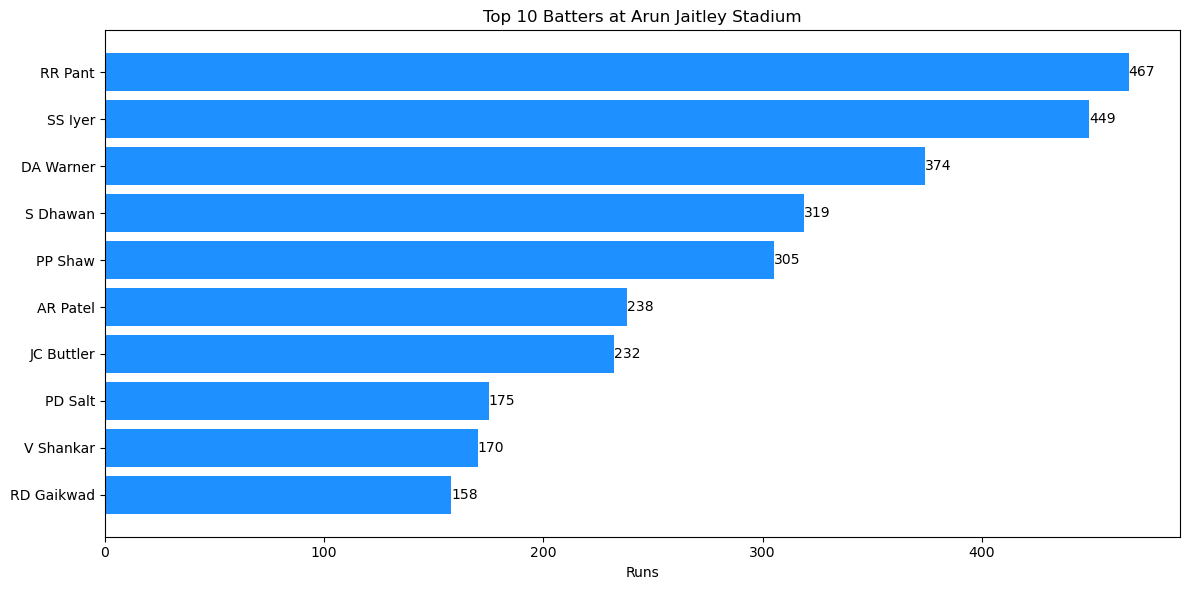

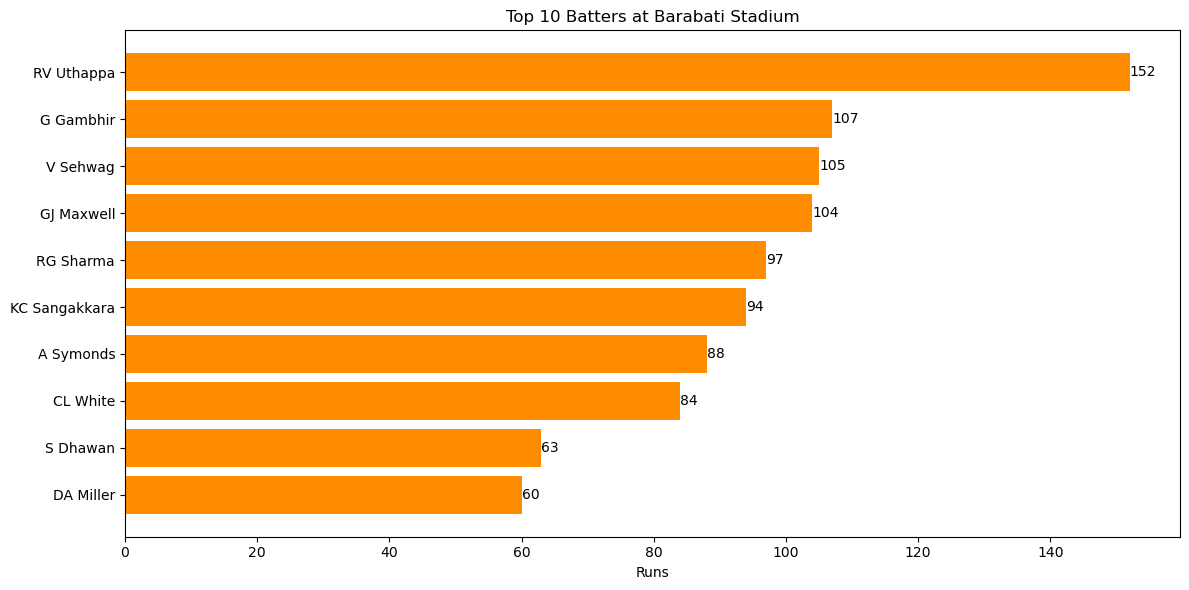

In [518]:

plt.figure(figsize=(12, 6))
venue_name = 'Arun Jaitley Stadium' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='dodgerblue')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  





plt.figure(figsize=(12, 6))
venue_name = 'Barabati Stadium' 
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='darkorange')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  

#  At Arun Jaitley Stadium, RR Pant emerged as the top scorer with 467 runs, followed by SS Iyer with 449 runs.
# Other notable performers like DA Warner, S Dhawan, and PP Shaw also delivered solid performances, scoring between 300 to 370 runs.
#  At Barabati Stadium, RV Uthappa led the scoreboard with 152 runs. Players such as G Gambhir, V Sehwag, and
# GJ Maxwell also made notable contributions, each scoring around 100 to 110 runs on average.



# graph for 3rd and 4th venues

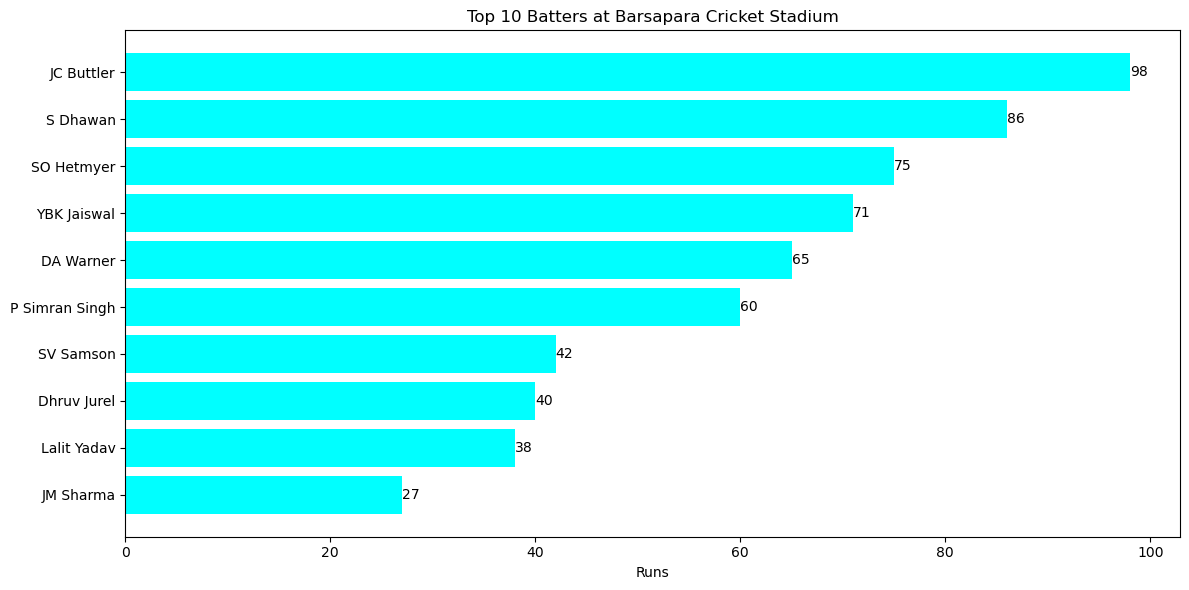

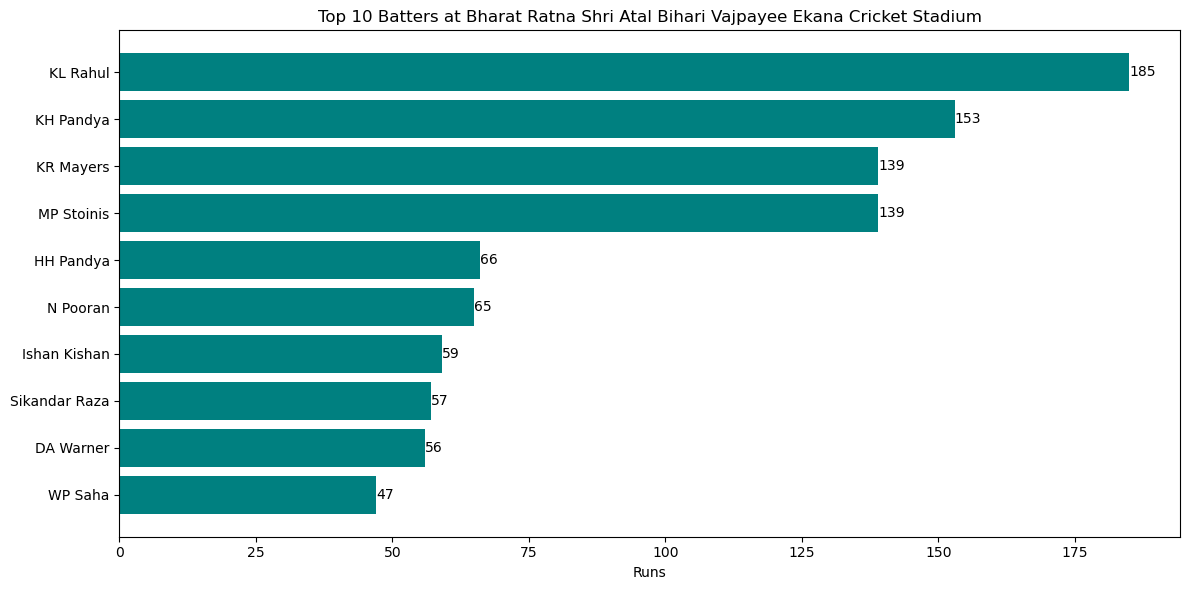

In [521]:

plt.figure(figsize=(12, 6))
venue_name = 'Barsapara Cricket Stadium'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='cyan')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  




plt.figure(figsize=(12, 6))
venue_name = 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='teal')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  







 # At Barsapara Cricket Stadium, JC Buttler led the charts with 98 runs, followed by S Dhawan with 86 runs. 
# Other key contributors included SO Hetmyer and YBK Jaiswal, scoring 75 and 71 runs respectively.


# At Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, KL Rahul topped the list with 185 runs, with KH Pandya securing the second spot 
# with 153 runs. Players like KR Mayers and MP Stoinis also showcased exceptional performances, each scoring 139 runs.



# graph for 5 th and 6th venues

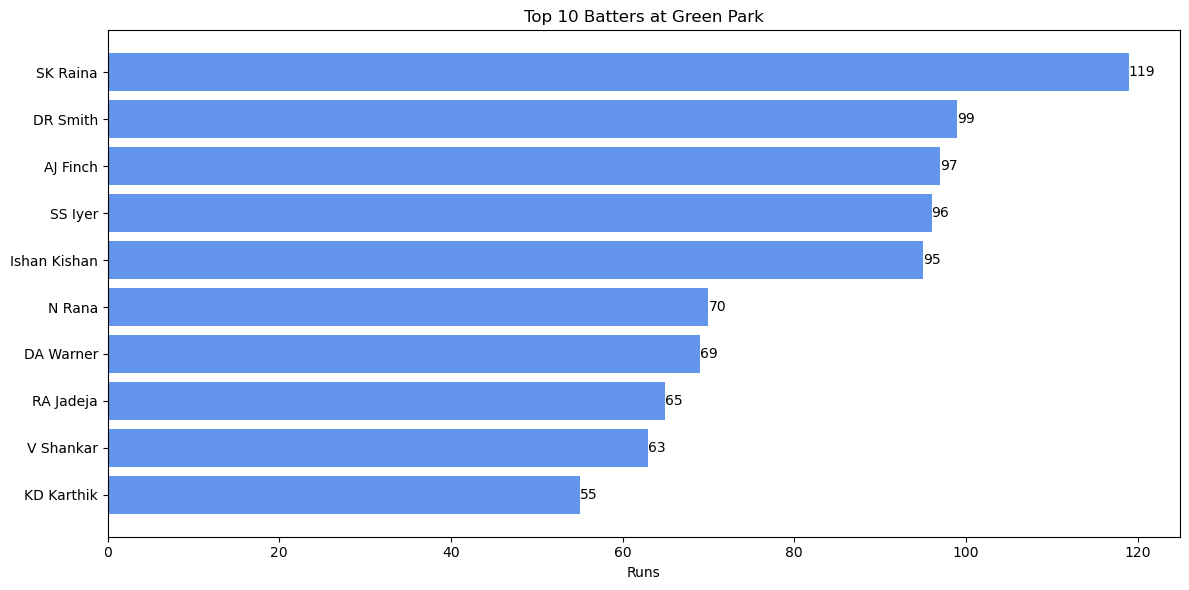

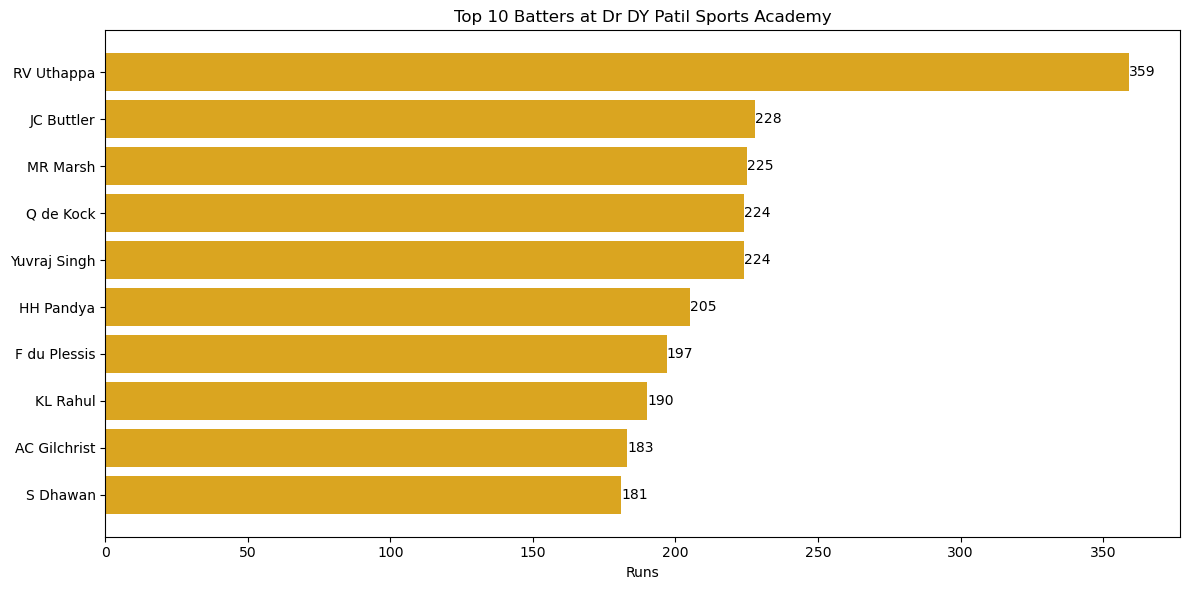

In [524]:

plt.figure(figsize=(12, 6))
venue_name = 'Green Park'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='cornflowerblue')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  




plt.figure(figsize=(12, 6))
venue_name = 'Dr DY Patil Sports Academy'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='goldenrod')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  







# At Green Park, Suresh Raina emerged as the top scorer with 119 runs.
# Other notable performances came from players like DR Smith, AJ Finch, Shreyas Iyer, and Ishan Kishan, 
# all scoring between 95 to 99 runs, showing consistent batting efforts on this ground.
#  At Dr DY Patil Sports Academy, Robin Uthappa led the chart with 359 runs.
# He was followed by power-packed performances from Jos Buttler (228 runs), Mitchell Marsh (225 runs), 
# Quinton de Kock (224 runs), and Yuvraj Singh (224 runs) — reflecting an exceptional batting display by multiple top-tier players at this venue.



In [526]:
# graph 7 th and 8th

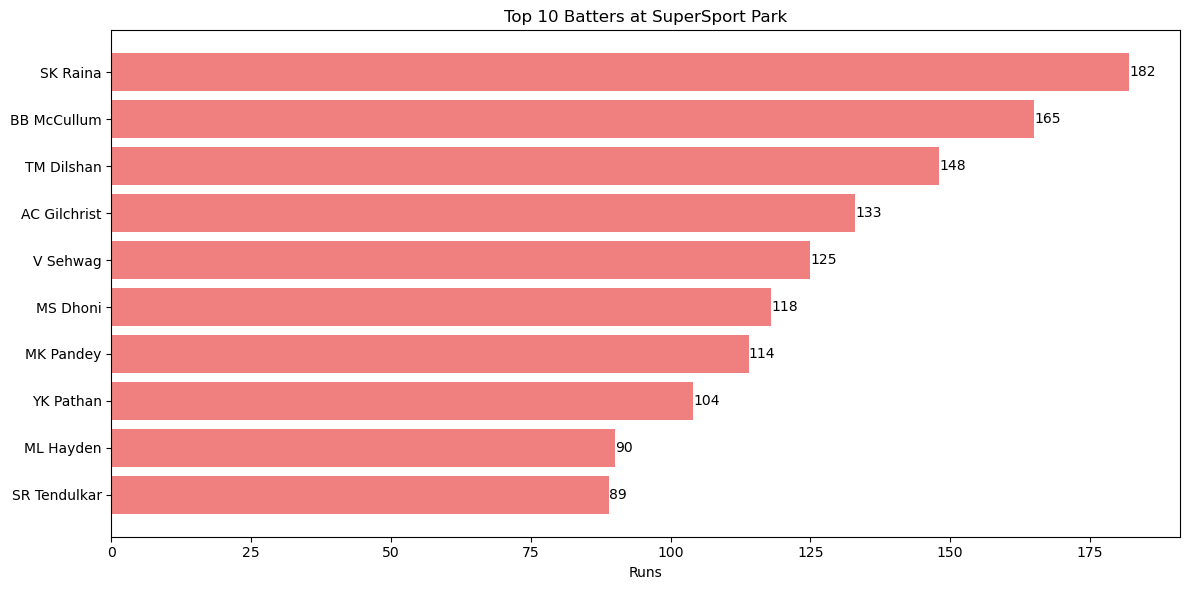

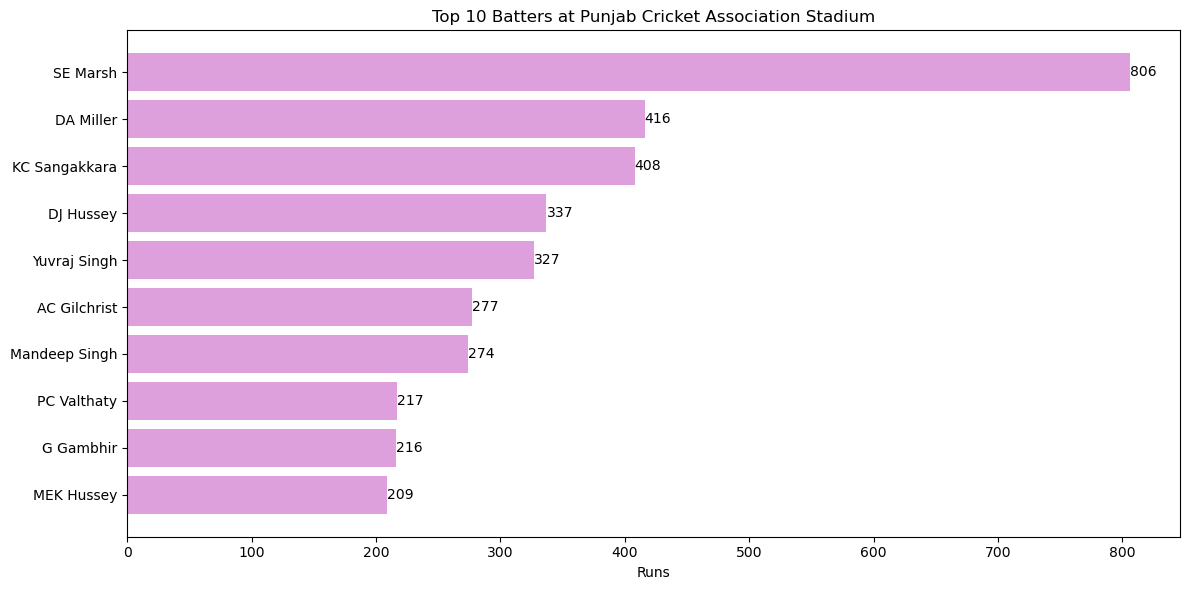

In [527]:

plt.figure(figsize=(12, 6))
venue_name = 'SuperSport Park'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='lightcoral')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  




plt.figure(figsize=(12, 6))
venue_name = 'Punjab Cricket Association Stadium'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='plum')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  







#  Supersport Park
# At Supersport Park, SK Raina led the charts with 182 runs, followed by BB McCullum with 165 runs. Players like TM Dilshan and AC Gilchrist 
# also delivered strong performances, consistently scoring in the 130–165 run range, highlighting the venue’s support for aggressive batting.

#  Punjab Cricket Association Stadium
# At the Punjab Cricket Association Stadium, SE Marsh dominated with an impressive 806 runs, showcasing an outstanding performance at this venue. 
# Following him, DA Miller and KC Sangakkara scored 416 and 408 runs respectively.
# Additionally, several other players including DJ Hussey and Yuvraj Singh crossed the 250-run mark,
# underlining the depth of quality performances on this ground.

In [529]:
#graph for 9th aand 10th graph

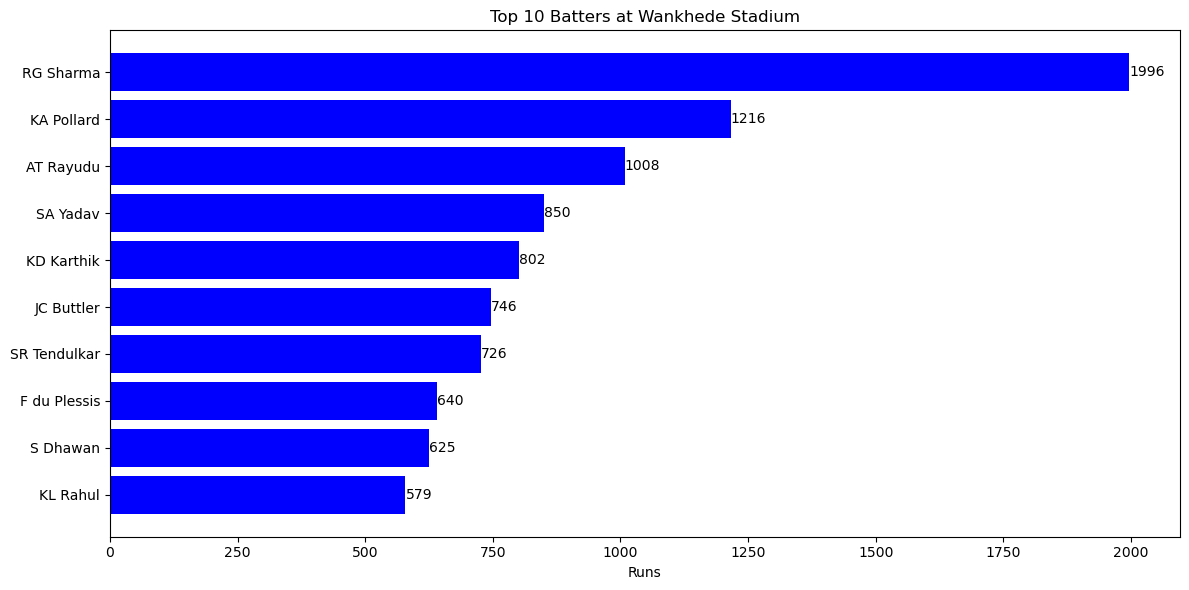

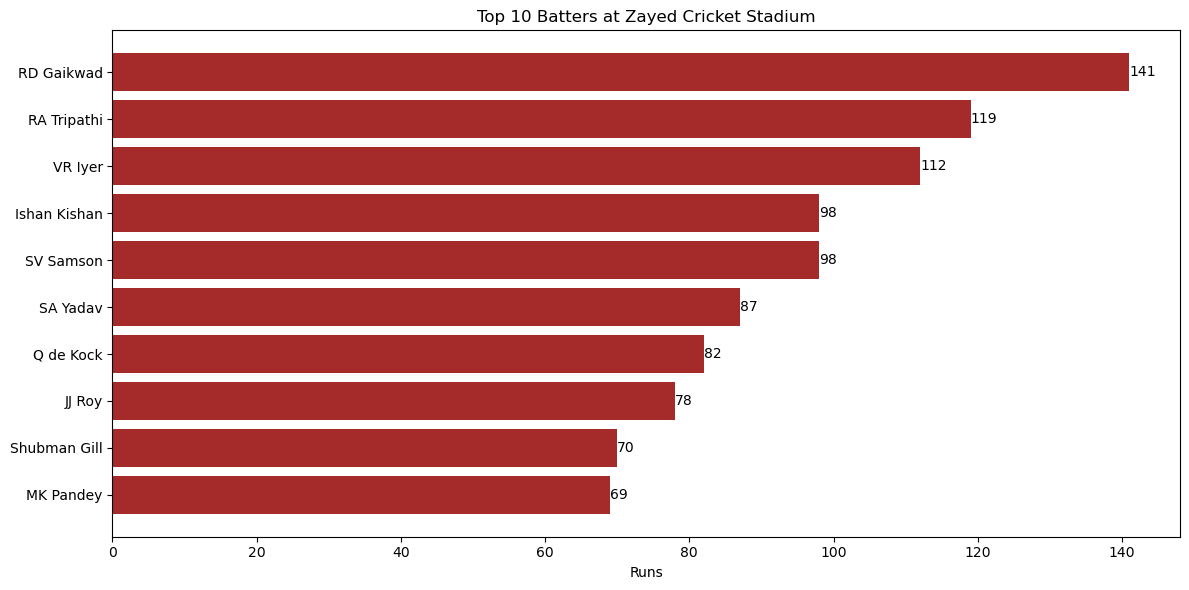

In [530]:

plt.figure(figsize=(12, 6))
venue_name = 'Wankhede Stadium'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='Blue')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  




plt.figure(figsize=(12, 6))
venue_name = 'Zayed Cricket Stadium'
venue_data = top_per_venue[top_per_venue['Venue'] == venue_name]

plt.barh(venue_data['Batter'], venue_data['Batter Runs'], color='Brown')
plt.xlabel('Runs')
plt.title(f'Top 10 Batters at {venue_name}')
plt.gca().invert_yaxis()  # Highest on top

for index, value in enumerate(venue_data['Batter Runs']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()  







# Wankhede Stadium
# At Wankhede Stadium, RG Sharma dominated with a staggering 1996 runs, which is truly exceptional.
# He was followed by KA Pollard with 1216 runs and AT Rayudu with 1008 runs. Additionally, several other notable players, including SR Tendulkar, 
# recorded over 750 runs, highlighting consistent top-level performances at this iconic venue.

#  Zayed Cricket Stadium
# At Zayed Cricket Stadium, RD Gaikwad stood out with 142 runs, while RA Tripathi led with 229 runs. 
# Other players also made valuable contributions, averaging between 85 to 98 runs, showing competitive batting efforts at this overseas ground.

#  Project Summary
# This IPL Data Analysis project covers a comprehensive breakdown of IPL seasons from 2008 to 2024 (17 seasons). I analyzed data related to:

# Team performance and win trends

# Top batters and bowlers across all seasons

# Venue-wise batting and bowling analysis

#  Top players based on sixes, fours, centuries, and half-centuries

#  Consistency analysis for both batters and bowlers

#  All-rounder performance by combining batting and bowling metrics

# The project dives deep into individual and team statistics, explores venue-specific trends, and visualizes key insights using Matplotlib . 
# Each graph was designed to communicate performance intuitively and clearly.

#  Integration and Timeline
# I collaborated with ChatGPT (best AI ) throughout this project, brainstorming ideas, writing code, debugging issues, and improving visualizations. 
# We completed this end-to-end data analysis in less than 2 weeks, showing how rapid development and smart collaboration can produce meaningful results.

# This project was a hands-on application of real-world data science techniques and helped me sharpen my skills in:

# Data cleaning and preprocessing

# Data visualization

# Exploratory Data Analysis (EDA)

# Project planning and modular analysis

# This project brings me one step closer to my goal of becoming a top data scientist. 🚀💻